In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.formula.api as sm
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
import missingno as mn
from scipy.stats import skew
from warnings import filterwarnings
filterwarnings('ignore')
%matplotlib inline 
from imblearn.over_sampling import SMOTE

## Problem 1
You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.
1.1 Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it.¶

In [14]:
df= pd.read_excel('Election_Data.xlsx',sheet_name="Election_Dataset_Two Classes")

In [16]:
df.head(10)

Unnamed: 0    vote  age  economic.cond.national  economic.cond.household  \
0           1  Labour   43                       3                        3   
1           2  Labour   36                       4                        4   
2           3  Labour   35                       4                        4   
3           4  Labour   24                       4                        2   
4           5  Labour   41                       2                        2   
5           6  Labour   47                       3                        4   
6           7  Labour   57                       2                        2   
7           8  Labour   77                       3                        4   
8           9  Labour   39                       3                        3   
9          10  Labour   70                       3                        2   

   Blair  Hague  Europe  political.knowledge  gender  
0      4      1       2                    2  female  
1      4      4       5                    2    male  
2      5      2       3                    2    male  
3      2      1       4                    0  female  
4      1      1       6                    2    male  
5      4      4       4                    2    male  
6      4      4      11                    2    male  
7      4      1       1                    0    male  
8      4      4      11                    0  female  
9      5      1      11                    2    male

In [17]:
df.tail(5)


Unnamed: 0          vote  age  economic.cond.national  \
1520        1521  Conservative   67                       5   
1521        1522  Conservative   73                       2   
1522        1523        Labour   37                       3   
1523        1524  Conservative   61                       3   
1524        1525  Conservative   74                       2   

      economic.cond.household  Blair  Hague  Europe  political.knowledge  \
1520                        3      2      4      11                    3   
1521                        2      4      4       8                    2   
1522                        3      5      4       2                    2   
1523                        3      1      4      11                    2   
1524                        3      2      4      11                    0   

      gender  
1520    male  
1521    male  
1522    male  
1523    male  
1524  female

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


In [6]:
df.shape

(1525, 10)

In [6]:
df.drop("Unnamed: 0", inplace = True, axis =1)

In [7]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

<AxesSubplot:>

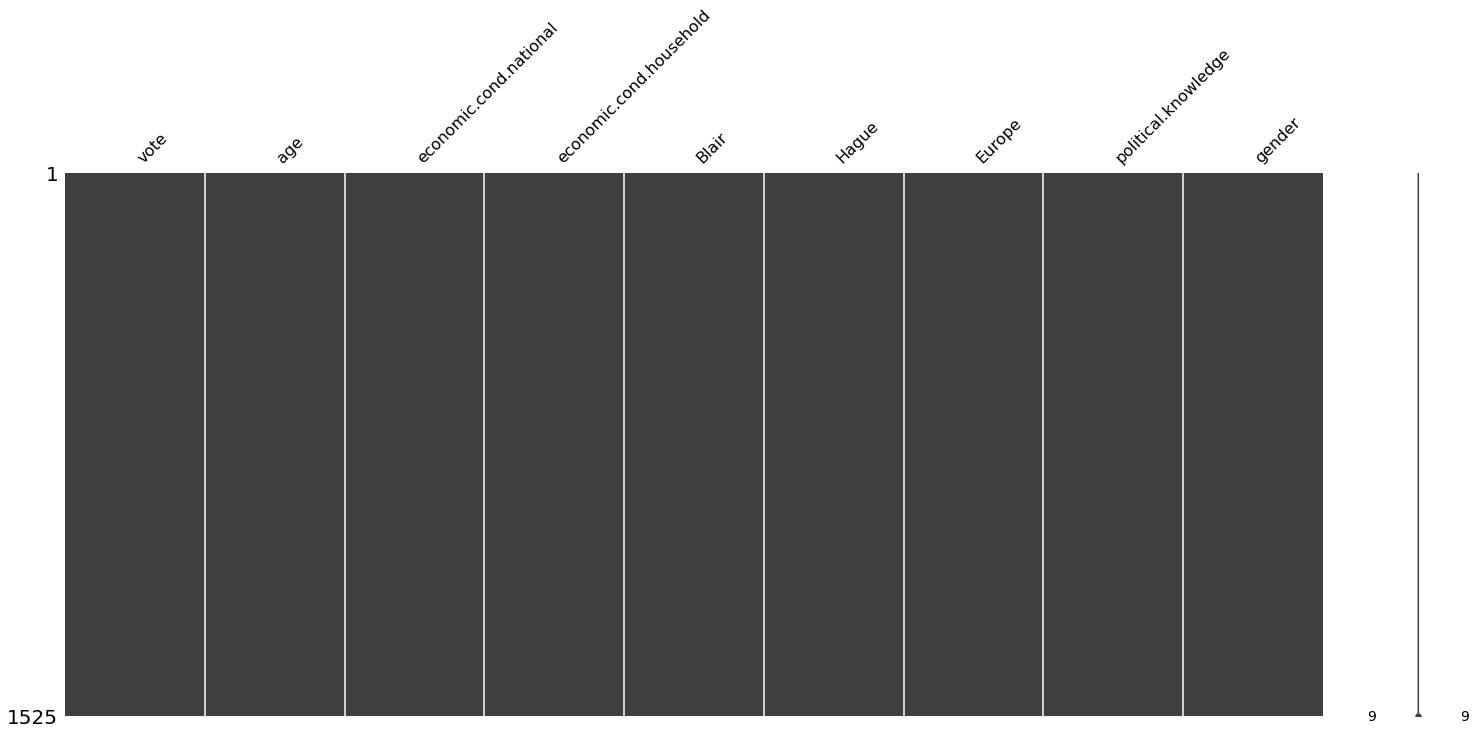

In [8]:
mn.matrix(df)

In [9]:
dups=df.duplicated()
print("Total no of duplicate values = %d" % (dups.sum()))
df[dups]

Total no of duplicate values = 8


vote  age  economic.cond.national  economic.cond.household  \
67          Labour   35                       4                        4   
626         Labour   39                       3                        4   
870         Labour   38                       2                        4   
983   Conservative   74                       4                        3   
1154  Conservative   53                       3                        4   
1236        Labour   36                       3                        3   
1244        Labour   29                       4                        4   
1438        Labour   40                       4                        3   

      Blair  Hague  Europe  political.knowledge  gender  
67        5      2       3                    2    male  
626       4      2       5                    2    male  
870       2      2       4                    3    male  
983       2      4       8                    2  female  
1154      2      2       6                    0  female  
1236      2      2       6                    2  female  
1244      4      2       2                    2  female  
1438      4      2       2                    2    male

In [10]:
print('Before dropping the Duplicate Values',df.shape)
df.drop_duplicates(inplace=True) 
print('After dropping the Duplicate Values',df.shape)

Before dropping the Duplicate Values (1525, 9)
After dropping the Duplicate Values (1517, 9)


In [11]:
df.vote.value_counts()

Labour          1057
Conservative     460
Name: vote, dtype: int64

In [12]:
for feature in df.columns:
    if df[feature].dtype=='object':
           print(feature.upper() ," ",df[feature].nunique())
           print(df[feature].value_counts().sort_values())

VOTE   2
Conservative     460
Labour          1057
Name: vote, dtype: int64
GENDER   2
male      709
female    808
Name: gender, dtype: int64


In [13]:
df = df.rename(columns = {'political.knowledge': 'political_knowledge','economic.cond.national':'economic_cond_national','economic.cond.household':'economic_cond_household'}, inplace = False)

In [305]:
df.describe(include="all")

vote          age  economic_cond_national  \
count  1517.000000  1517.000000             1517.000000   
mean      0.696770    54.241266                3.245221   
std       0.459805    15.701741                0.881792   
min       0.000000    24.000000                1.000000   
25%       0.000000    41.000000                3.000000   
50%       1.000000    53.000000                3.000000   
75%       1.000000    67.000000                4.000000   
max       1.000000    93.000000                5.000000   

       economic_cond_household        Blair        Hague       Europe  \
count              1517.000000  1517.000000  1517.000000  1517.000000   
mean                  3.137772     3.335531     2.749506     6.740277   
std                   0.931069     1.174772     1.232479     3.299043   
min                   1.000000     1.000000     1.000000     1.000000   
25%                   3.000000     2.000000     2.000000     4.000000   
50%                   3.000000     4.000000     2.000000     6.000000   
75%                   4.000000     4.000000     4.000000    10.000000   
max                   5.000000     5.000000     5.000000    11.000000   

       political_knowledge       gender  
count          1517.000000  1517.000000  
mean              1.540541     0.532630  
std               1.084417     0.499099  
min               0.000000     0.000000  
25%               0.000000     0.000000  
50%               2.000000     1.000000  
75%               2.000000     1.000000  
max               3.000000     1.000000

In [306]:
df.skew()

vote                      -0.857014
age                        0.139800
economic_cond_national    -0.238474
economic_cond_household   -0.144148
Blair                     -0.539514
Hague                      0.146191
Europe                    -0.141891
political_knowledge       -0.422928
gender                    -0.130929
dtype: float64

## 1.2 Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers.

In [307]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------\n")
    print(df[column].describe(),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------\n")
    sns.distplot(df[column], kde=True, color='g');
    plt.show()
    
    print("Skewness of " + column)
    print(skew(df[column]),end=' ')
    print("---------------------------------------------------------------------------- \n")

    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------\n")
    ax = sns.boxplot(x=df[column])
    plt.show()
    
    plt.figure(figsize=(10,5))
    print("Histogram of " + column)
    print("----------------------------------------------------------------------------\n")
    plt.hist(df[column],color='g');
    plt.show()

Description of age
----------------------------------------------------------------------------

count    1517.000000
mean       54.241266
std        15.701741
min        24.000000
25%        41.000000
50%        53.000000
75%        67.000000
max        93.000000
Name: age, dtype: float64 Distribution of age
----------------------------------------------------------------------------



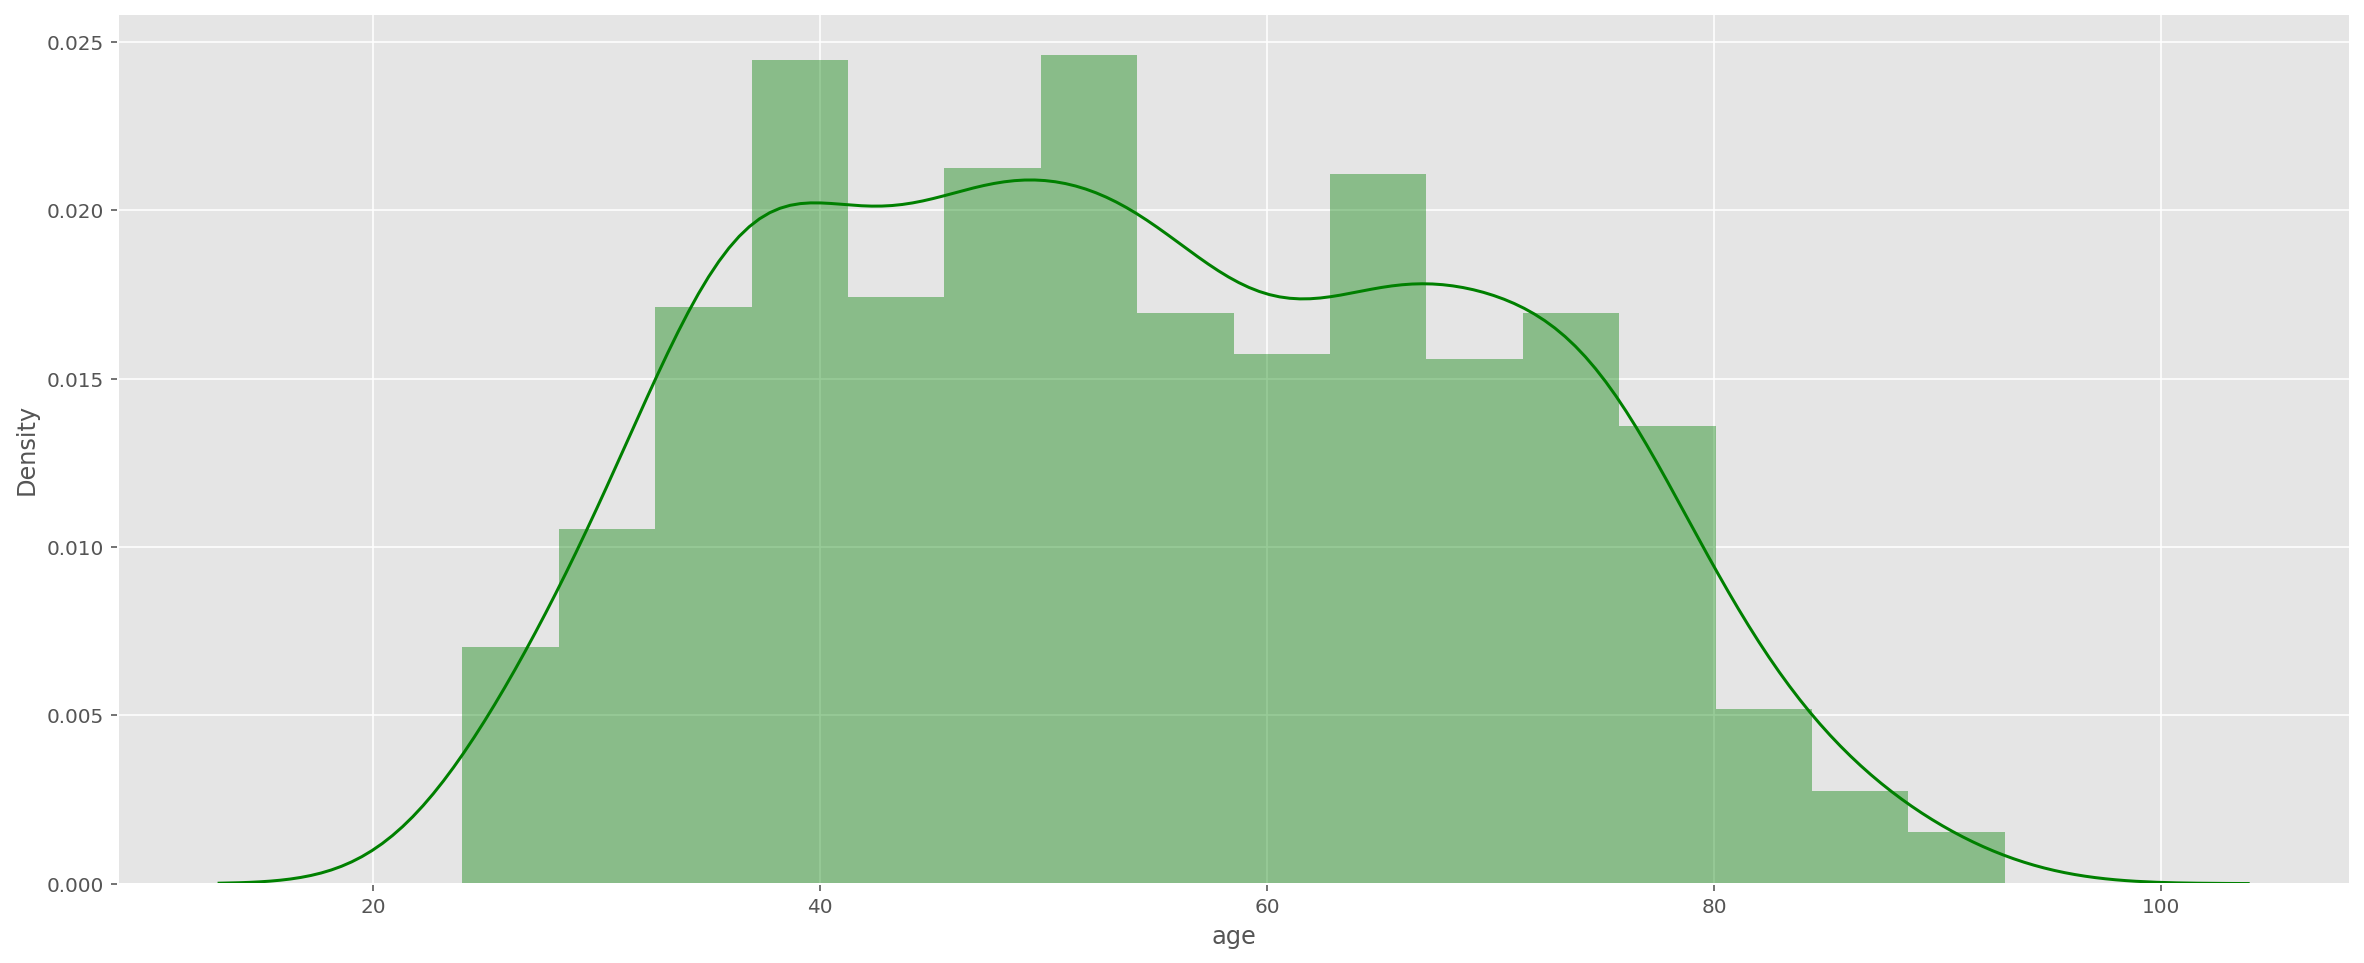

Skewness of age
0.1396615989084527 ---------------------------------------------------------------------------- 

BoxPlot of age
----------------------------------------------------------------------------



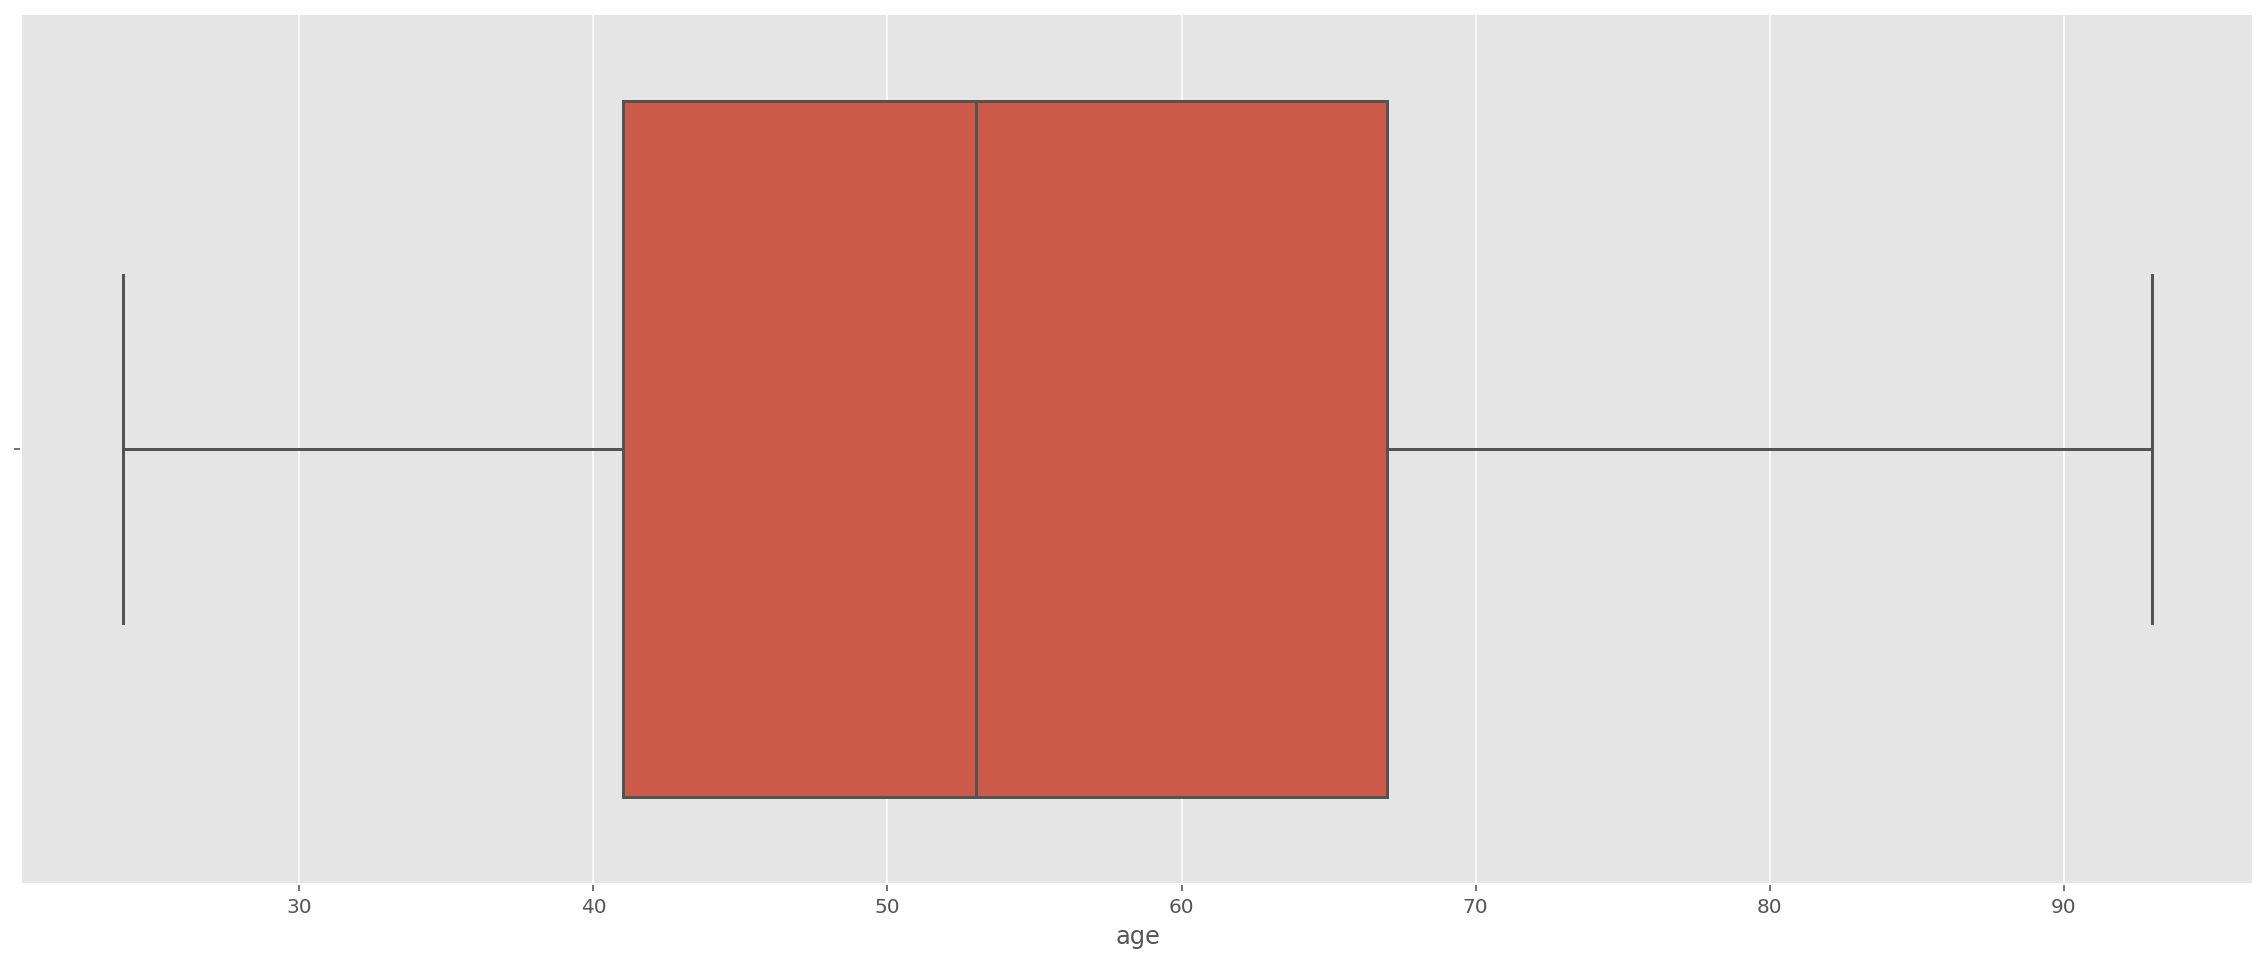

Histogram of age
----------------------------------------------------------------------------



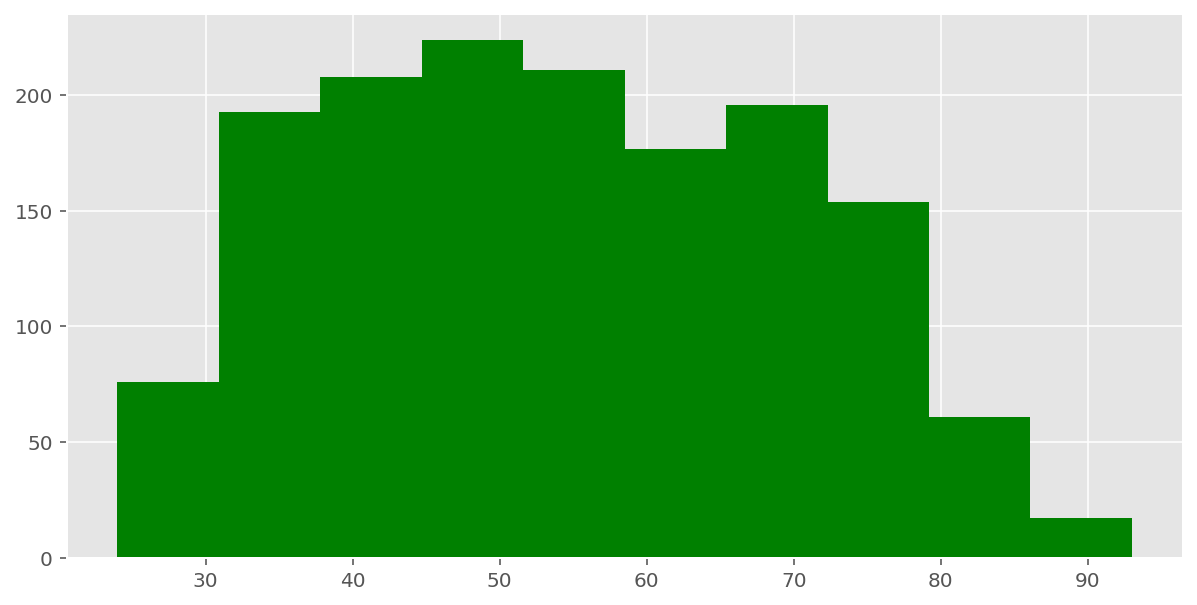

In [308]:
univariateAnalysis_numeric('age',20)

Description of economic_cond_national
----------------------------------------------------------------------------

count    1517.000000
mean        3.245221
std         0.881792
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: economic_cond_national, dtype: float64 Distribution of economic_cond_national
----------------------------------------------------------------------------



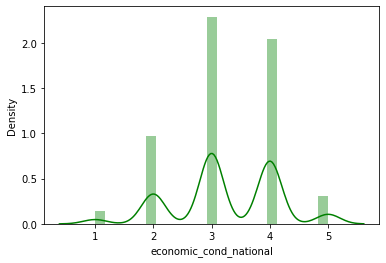

Skewness of economic_cond_national
-0.23823834819079348 ---------------------------------------------------------------------------- 

BoxPlot of economic_cond_national
----------------------------------------------------------------------------



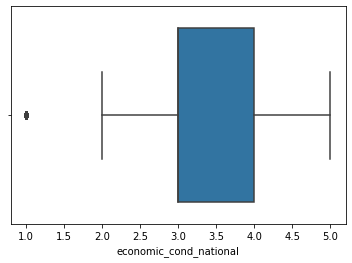

Histogram of economic_cond_national
----------------------------------------------------------------------------



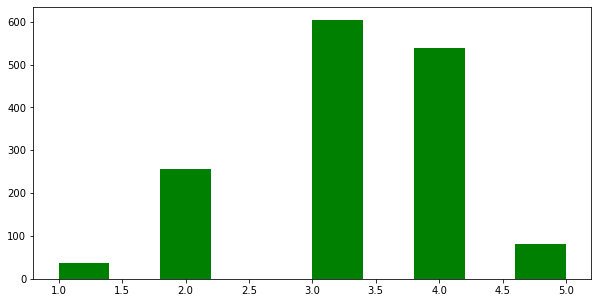

In [18]:
univariateAnalysis_numeric('economic_cond_national',20)

Description of economic_cond_household
----------------------------------------------------------------------------

count    1517.000000
mean        3.137772
std         0.931069
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: economic_cond_household, dtype: float64 Distribution of economic_cond_household
----------------------------------------------------------------------------



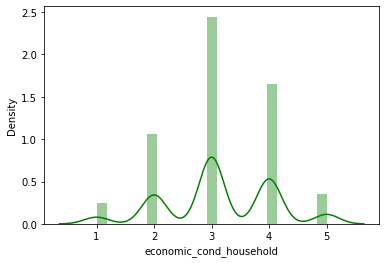

Skewness of economic_cond_household
-0.144005097351352 ---------------------------------------------------------------------------- 

BoxPlot of economic_cond_household
----------------------------------------------------------------------------



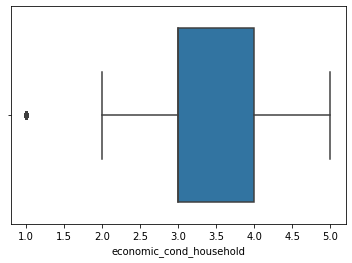

Histogram of economic_cond_household
----------------------------------------------------------------------------



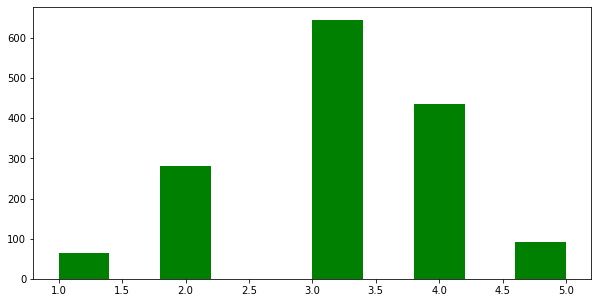

In [19]:
univariateAnalysis_numeric('economic_cond_household',20)

Description of Blair
----------------------------------------------------------------------------

count    1517.000000
mean        3.335531
std         1.174772
min         1.000000
25%         2.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: Blair, dtype: float64 Distribution of Blair
----------------------------------------------------------------------------



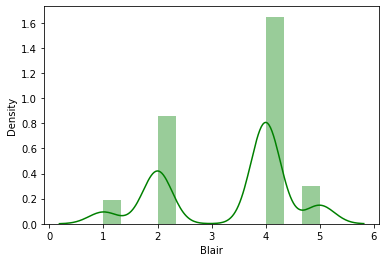

Skewness of Blair
-0.5389805841647254 ---------------------------------------------------------------------------- 

BoxPlot of Blair
----------------------------------------------------------------------------



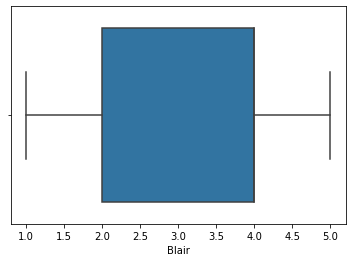

Histogram of Blair
----------------------------------------------------------------------------



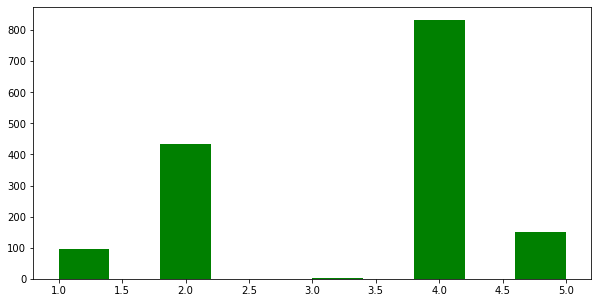

In [20]:
univariateAnalysis_numeric('Blair',20)

Description of Hague
----------------------------------------------------------------------------

count    1517.000000
mean        2.749506
std         1.232479
min         1.000000
25%         2.000000
50%         2.000000
75%         4.000000
max         5.000000
Name: Hague, dtype: float64 Distribution of Hague
----------------------------------------------------------------------------



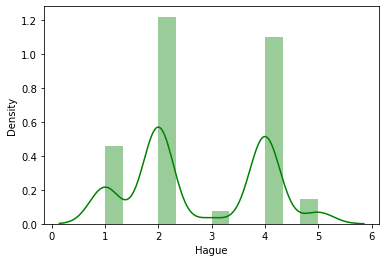

Skewness of Hague
0.14604675166469203 ---------------------------------------------------------------------------- 

BoxPlot of Hague
----------------------------------------------------------------------------



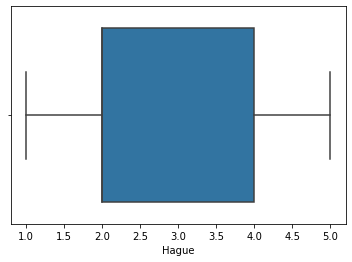

Histogram of Hague
----------------------------------------------------------------------------



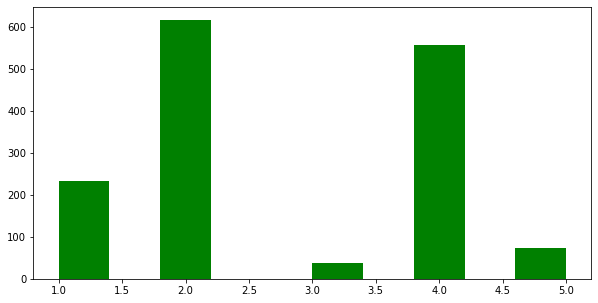

In [21]:
univariateAnalysis_numeric('Hague',20)

Description of Europe
----------------------------------------------------------------------------

count    1517.000000
mean        6.740277
std         3.299043
min         1.000000
25%         4.000000
50%         6.000000
75%        10.000000
max        11.000000
Name: Europe, dtype: float64 Distribution of Europe
----------------------------------------------------------------------------



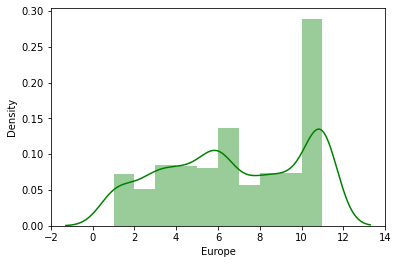

Skewness of Europe
-0.1417506103835579 ---------------------------------------------------------------------------- 

BoxPlot of Europe
----------------------------------------------------------------------------



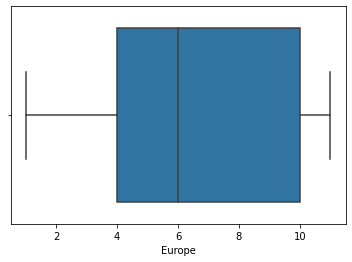

Histogram of Europe
----------------------------------------------------------------------------



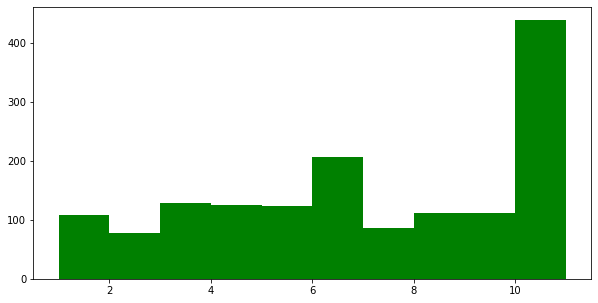

In [22]:
univariateAnalysis_numeric('Europe',20)

Description of political_knowledge
----------------------------------------------------------------------------

count    1517.000000
mean        1.540541
std         1.084417
min         0.000000
25%         0.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: political_knowledge, dtype: float64 Distribution of political_knowledge
----------------------------------------------------------------------------



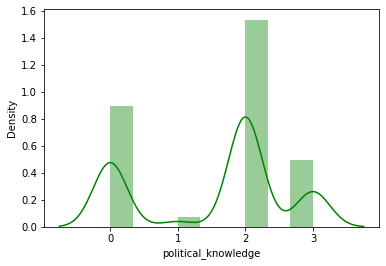

Skewness of political_knowledge
-0.42250931746800596 ---------------------------------------------------------------------------- 

BoxPlot of political_knowledge
----------------------------------------------------------------------------



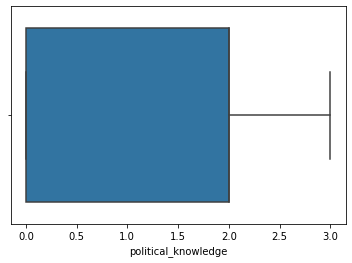

Histogram of political_knowledge
----------------------------------------------------------------------------



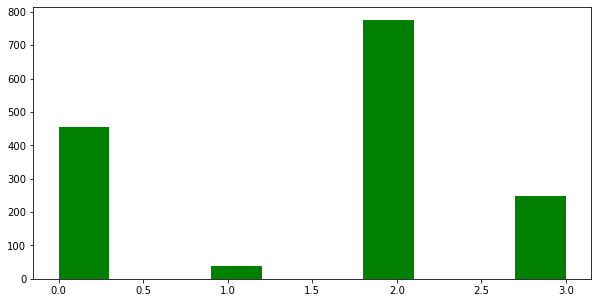

In [23]:
univariateAnalysis_numeric('political_knowledge',20)

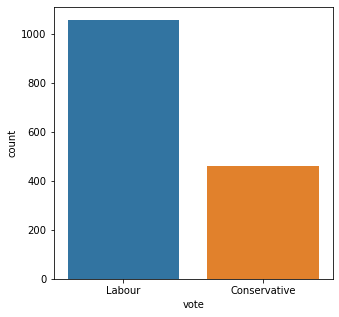

In [25]:
plt.figure(figsize=(5,5))
sns.countplot(df["vote"])
plt.show()

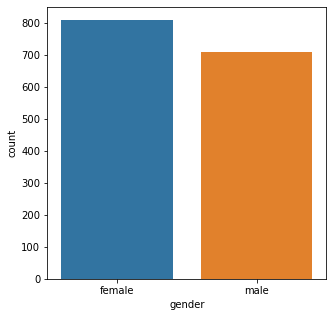

In [26]:
plt.figure(figsize=(5,5))
sns.countplot(df["gender"])
plt.show()

<AxesSubplot:xlabel='vote', ylabel='age'>

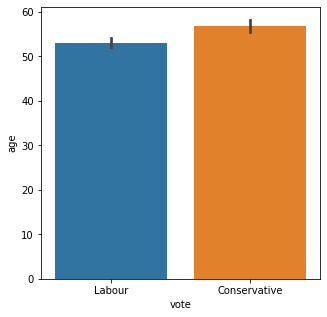

In [27]:
plt.figure(figsize=(5,5))
sns.barplot(data = df, x='vote',y='age')

<AxesSubplot:xlabel='gender', ylabel='age'>

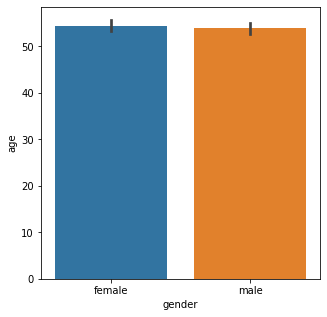

In [28]:
plt.figure(figsize=(5,5))
sns.barplot(data = df, x='gender',y='age')

<AxesSubplot:xlabel='vote'>

<Figure size 7200x360 with 0 Axes>

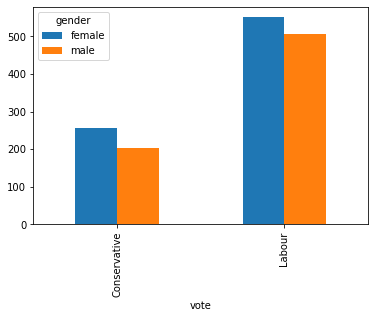

In [30]:
plt.figure(figsize=(100,5))
pd.crosstab(df.vote,df.gender).plot(kind='bar')

<AxesSubplot:xlabel='age'>

<Figure size 86400x86400 with 0 Axes>

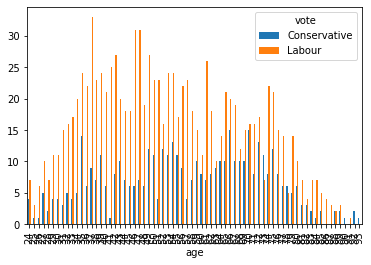

In [31]:
plt.figure(figsize=(1200,1200))
pd.crosstab(df.age,df.vote).plot(kind='bar')

<AxesSubplot:xlabel='vote'>

<Figure size 7200x360 with 0 Axes>

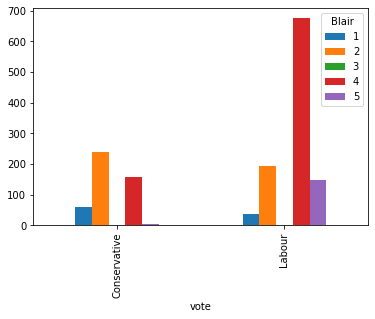

In [32]:
plt.figure(figsize=(100,5))
pd.crosstab(df.vote,df.Blair).plot(kind='bar')

<AxesSubplot:xlabel='vote'>

<Figure size 7200x720 with 0 Axes>

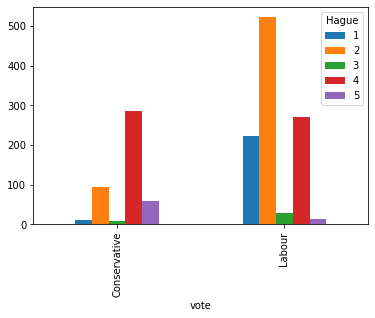

In [33]:
plt.figure(figsize=(100,10))
pd.crosstab(df.vote,df.Hague).plot(kind='bar')

<AxesSubplot:xlabel='vote'>

<Figure size 7200x720 with 0 Axes>

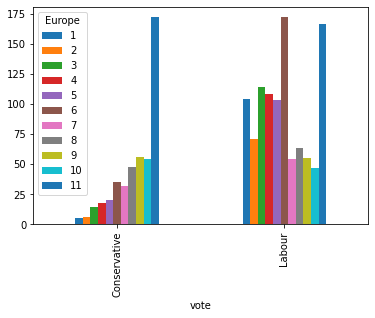

In [34]:
plt.figure(figsize=(100,10))
pd.crosstab(df.vote,df.Europe).plot(kind='bar')

<AxesSubplot:xlabel='vote'>

<Figure size 7200x720 with 0 Axes>

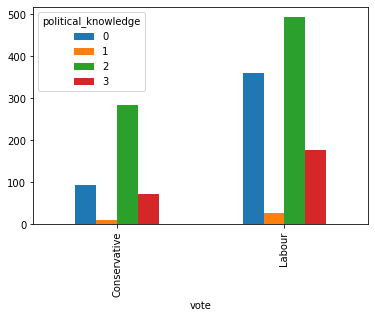

In [35]:
plt.figure(figsize=(100,10))
pd.crosstab(df.vote,df.political_knowledge).plot(kind='bar')

<AxesSubplot:xlabel='vote'>

<Figure size 7200x720 with 0 Axes>

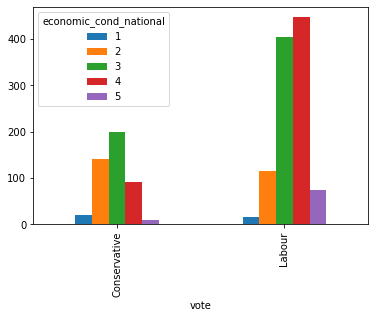

In [36]:
plt.figure(figsize=(100,10))
pd.crosstab(df.vote,df.economic_cond_national).plot(kind='bar')

<AxesSubplot:xlabel='vote'>

<Figure size 7200x720 with 0 Axes>

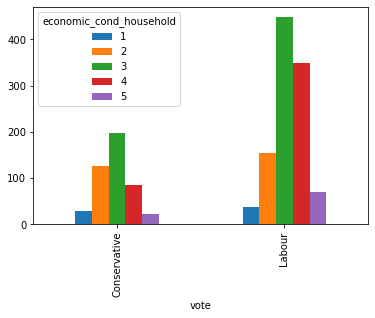

In [37]:
plt.figure(figsize=(100,10))
pd.crosstab(df.vote,df.economic_cond_household).plot(kind='bar')

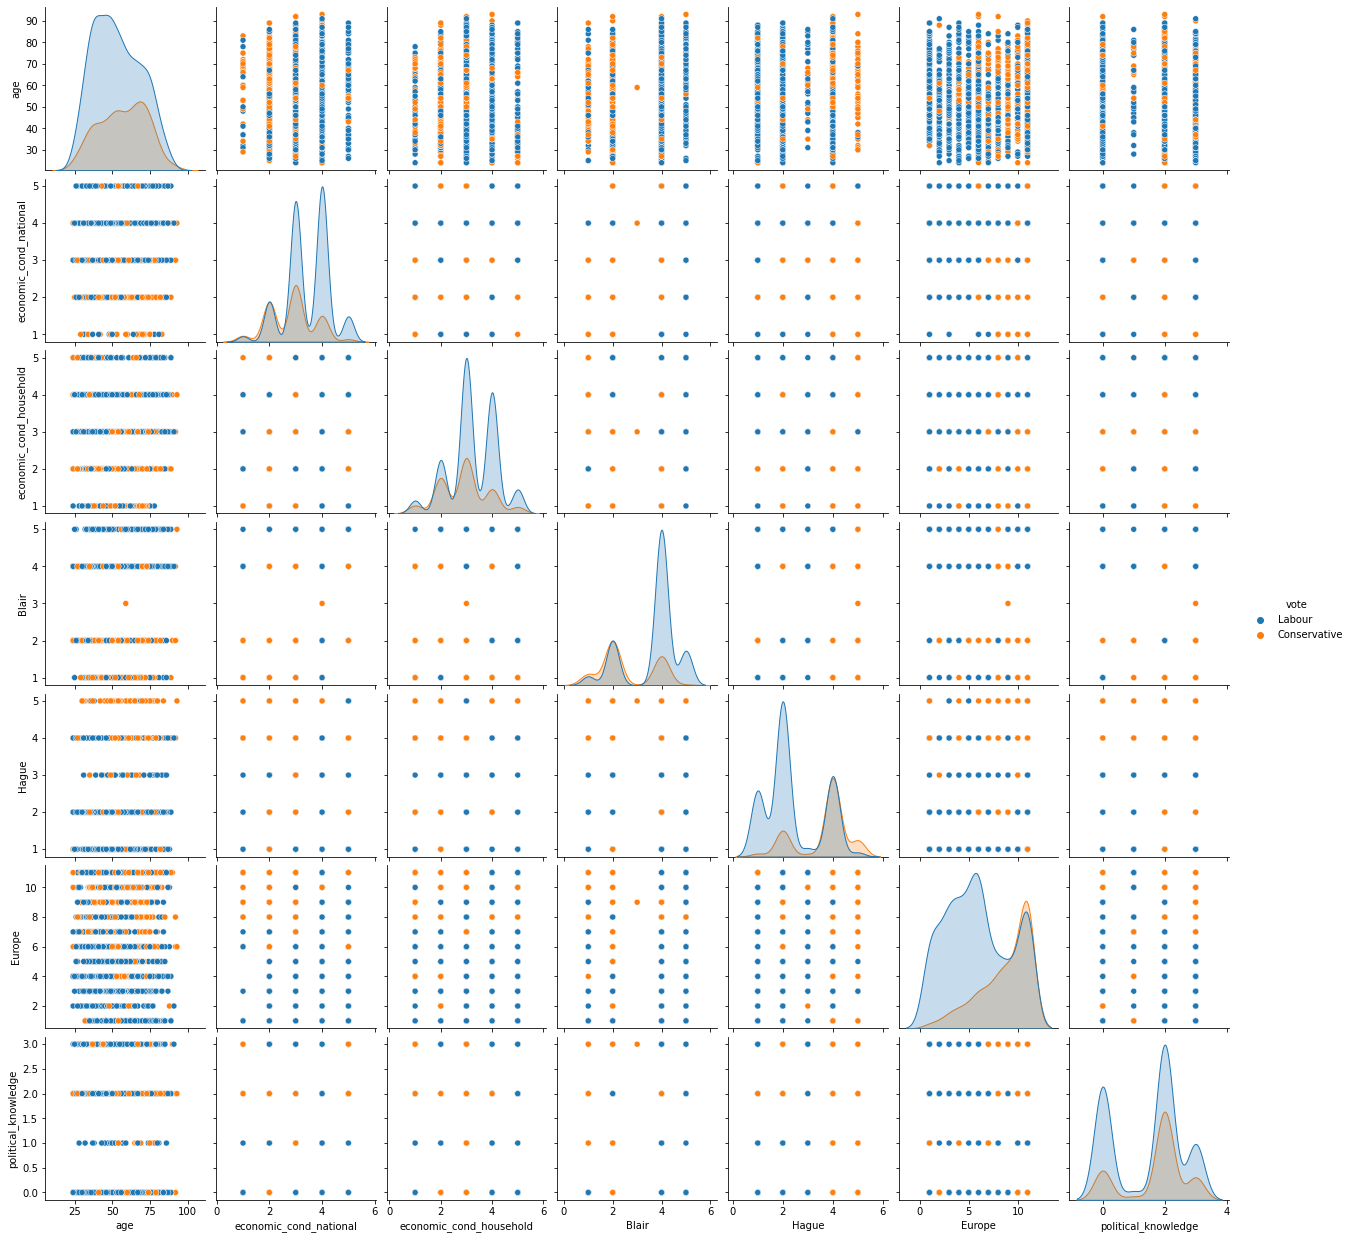

In [38]:
sns.pairplot(df,hue='vote')

In [39]:
df.corr()

age  economic_cond_national  \
age                      1.000000                0.018687   
economic_cond_national   0.018687                1.000000   
economic_cond_household -0.038868                0.347687   
Blair                    0.032084                0.326141   
Hague                    0.031144               -0.200790   
Europe                   0.064562               -0.209150   
political_knowledge     -0.046598               -0.023510   

                         economic_cond_household     Blair     Hague  \
age                                    -0.038868  0.032084  0.031144   
economic_cond_national                  0.347687  0.326141 -0.200790   
economic_cond_household                 1.000000  0.215822 -0.100392   
Blair                                   0.215822  1.000000 -0.243508   
Hague                                  -0.100392 -0.243508  1.000000   
Europe                                 -0.112897 -0.295944  0.285738   
political_knowledge                    -0.038528 -0.021299 -0.029906   

                           Europe  political_knowledge  
age                      0.064562            -0.046598  
economic_cond_national  -0.209150            -0.023510  
economic_cond_household -0.112897            -0.038528  
Blair                   -0.295944            -0.021299  
Hague                    0.285738            -0.029906  
Europe                   1.000000            -0.151197  
political_knowledge     -0.151197             1.000000

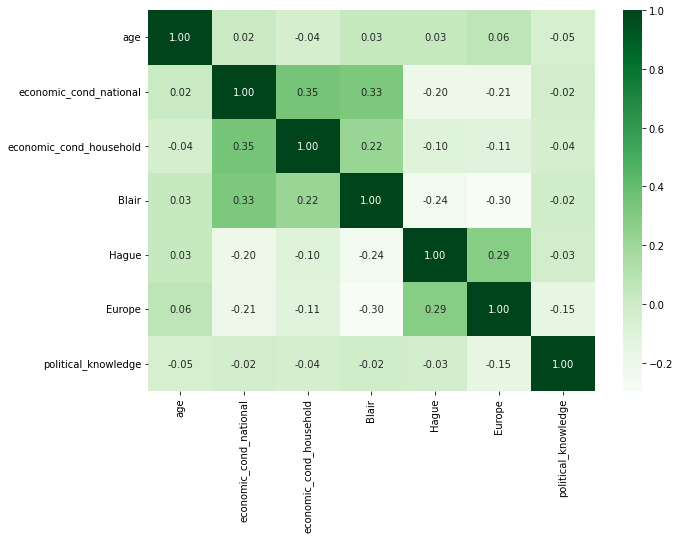

In [42]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Greens')
plt.show()

In [43]:
df.head(10)

vote  age  economic_cond_national  economic_cond_household  Blair  Hague  \
0  Labour   43                       3                        3      4      1   
1  Labour   36                       4                        4      4      4   
2  Labour   35                       4                        4      5      2   
3  Labour   24                       4                        2      2      1   
4  Labour   41                       2                        2      1      1   
5  Labour   47                       3                        4      4      4   
6  Labour   57                       2                        2      4      4   
7  Labour   77                       3                        4      4      1   
8  Labour   39                       3                        3      4      4   
9  Labour   70                       3                        2      5      1   

   Europe  political_knowledge  gender  
0       2                    2  female  
1       5                    2    male  
2       3                    2    male  
3       4                    0  female  
4       6                    2    male  
5       4                    2    male  
6      11                    2    male  
7       1                    0    male  
8      11                    0  female  
9      11                    2    male

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1517 non-null   object
 1   age                      1517 non-null   int64 
 2   economic_cond_national   1517 non-null   int64 
 3   economic_cond_household  1517 non-null   int64 
 4   Blair                    1517 non-null   int64 
 5   Hague                    1517 non-null   int64 
 6   Europe                   1517 non-null   int64 
 7   political_knowledge      1517 non-null   int64 
 8   gender                   1517 non-null   object
dtypes: int64(7), object(2)
memory usage: 150.8+ KB


In [49]:
outlier = ['vote','age','economic_cond_national','economic_cond_household','Blair','Hague','Europe','political_knowledge','gender']

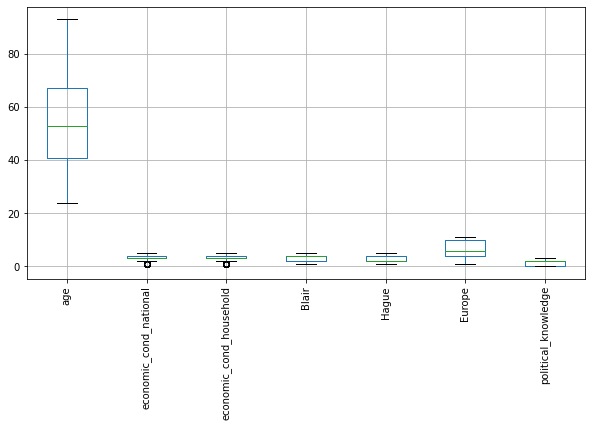

In [50]:
df[outlier].boxplot(figsize=(10,5))
plt.xticks(rotation=90)
plt.show()

## 1.3 Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30). 

In [51]:
df['vote']=np.where(df['vote'] =='Labour', '1', df['vote'])
df['vote']=np.where(df['vote'] =='Conservative', '0', df['vote'])

df['gender']=np.where(df['gender'] =='female', '1', df['gender'])
df['gender']=np.where(df['gender'] =='male', '0', df['gender'])

In [52]:
df['vote'] = df['vote'].astype('int64')

df['gender'] = df['gender'].astype('int64')

In [53]:
df.head()

vote  age  economic_cond_national  economic_cond_household  Blair  Hague  \
0     1   43                       3                        3      4      1   
1     1   36                       4                        4      4      4   
2     1   35                       4                        4      5      2   
3     1   24                       4                        2      2      1   
4     1   41                       2                        2      1      1   

   Europe  political_knowledge  gender  
0       2                    2       1  
1       5                    2       0  
2       3                    2       0  
3       4                    0       1  
4       6                    2       0

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   vote                     1517 non-null   int64
 1   age                      1517 non-null   int64
 2   economic_cond_national   1517 non-null   int64
 3   economic_cond_household  1517 non-null   int64
 4   Blair                    1517 non-null   int64
 5   Hague                    1517 non-null   int64
 6   Europe                   1517 non-null   int64
 7   political_knowledge      1517 non-null   int64
 8   gender                   1517 non-null   int64
dtypes: int64(9)
memory usage: 150.8 KB


In [55]:
# Arrange data into independent variables and dependent variables
X =  df.drop("vote",axis=1) ## Features
y = df["vote"]  ## Target

In [56]:
from scipy.stats import zscore

X[["age","economic_cond_national","economic_cond_household","Blair","Hague","Europe","political_knowledge","gender"]]=X[["age","economic_cond_national","economic_cond_household","Blair","Hague","Europe","political_knowledge","gender"]].apply(zscore)

In [57]:
X.head()

age  economic_cond_national  economic_cond_household     Blair  \
0 -0.716161               -0.278185                -0.148020  0.565802   
1 -1.162118                0.856242                 0.926367  0.565802   
2 -1.225827                0.856242                 0.926367  1.417312   
3 -1.926617                0.856242                -1.222408 -1.137217   
4 -0.843577               -1.412613                -1.222408 -1.988727   

      Hague    Europe  political_knowledge    gender  
0 -1.419969 -1.437338             0.423832  0.936736  
1  1.014951 -0.527684             0.423832 -1.067536  
2 -0.608329 -1.134120             0.423832 -1.067536  
3 -1.419969 -0.830902            -1.421084  0.936736  
4 -1.419969 -0.224465             0.423832 -1.067536

In [58]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: vote, dtype: int64

In [59]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [60]:
y_train.value_counts(1)

1    0.71065
0    0.28935
Name: vote, dtype: float64

In [61]:
y_test.value_counts(1)

1    0.664474
0    0.335526
Name: vote, dtype: float64

### 1.4 Apply Logistic Regression and LDA (linear discriminant analysis).

In [62]:
LogR_base_model = LogisticRegression(C=1000.0, solver = 'newton-cg')
LogR_base_model.fit(X_train, y_train)

LogisticRegression(C=1000.0, solver='newton-cg')

In [63]:
LogisticRegression(C=1000.0, solver='newton-cg')

LogisticRegression(C=1000.0, solver='newton-cg')

In [296]:
ytrain_predict_LogR_base = LogR_base_model.predict(X_train)
ytest_predict_LogR_base = LogR_base_model.predict(X_test)

In [65]:
ytest_predict_prob_LogR_Base=LogR_base_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob_LogR_Base).head()

0         1
0  0.424283  0.575717
1  0.148428  0.851572
2  0.007187  0.992813
3  0.836347  0.163653
4  0.068408  0.931592

In [66]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
confusion_matrix(y_train, ytrain_predict_LogR_base)

array([[196, 111],
       [ 68, 686]], dtype=int64)

In [67]:
print(classification_report(y_train, ytrain_predict_LogR_base))

              precision    recall  f1-score   support

           0       0.74      0.64      0.69       307
           1       0.86      0.91      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.77      0.79      1061
weighted avg       0.83      0.83      0.83      1061



In [68]:
confusion_matrix(y_test, ytest_predict_LogR_base)

array([[113,  40],
       [ 35, 268]], dtype=int64)

AUC: 0.890


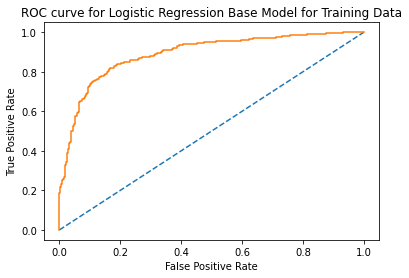

In [69]:
# predict probabilities
probs_LogR_base_train = LogR_base_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_LogR_base_train = probs_LogR_base_train[:, 1]
# calculate AUC
LogR_base_train_auc = roc_auc_score(y_train, probs_LogR_base_train)
print('AUC: %.3f' % LogR_base_train_auc)
# calculate roc curve
plt.title('ROC curve for Logistic Regression Base Model for Training Data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
train_fpr_LogR_base, train_tpr_LogR_base, train_thresholds_LogR_base = roc_curve(y_train, probs_LogR_base_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr_LogR_base, train_tpr_LogR_base);

AUC: 0.883


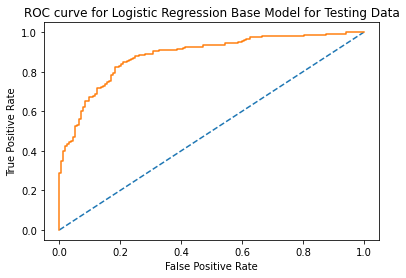

In [70]:
# predict probabilities
probs_LogR_base_test = LogR_base_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_LogR_base_test = probs_LogR_base_test[:, 1]
# calculate AUC
LogR_base_test_auc = roc_auc_score(y_test, probs_LogR_base_test)
print('AUC: %.3f' % LogR_base_test_auc)
# calculate roc curve
test_fpr_LogR_base, test_tpr_LogR_base, test_thresholds_LogR_base = roc_curve(y_test, probs_LogR_base_test)
plt.title('ROC curve for Logistic Regression Base Model for Testing Data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr_LogR_base, test_tpr_LogR_base);

 ### Regularised logistic regression

In [71]:
model_reg_LogR = LogisticRegression(solver='lbfgs',max_iter=10000,penalty='none',verbose=True,n_jobs=2,C=1.0)
model_reg_LogR.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    4.6s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', verbose=True)

In [72]:
ytrain_predict_LogR_reg = model_reg_LogR.predict(X_train)
ytest_predict_LogR_reg = model_reg_LogR.predict(X_test)

In [73]:
ytest_predict_prob_LogR_reg=model_reg_LogR.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob_LogR_reg).head()

0         1
0  0.424283  0.575717
1  0.148427  0.851573
2  0.007187  0.992813
3  0.836350  0.163650
4  0.068407  0.931593

In [74]:
confusion_matrix(y_train, ytrain_predict_LogR_reg)

array([[196, 111],
       [ 68, 686]], dtype=int64)

In [75]:
confusion_matrix(y_test, ytest_predict_LogR_reg)

array([[113,  40],
       [ 35, 268]], dtype=int64)

In [76]:
print(classification_report(y_train, ytrain_predict_LogR_reg))

              precision    recall  f1-score   support

           0       0.74      0.64      0.69       307
           1       0.86      0.91      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.77      0.79      1061
weighted avg       0.83      0.83      0.83      1061



In [77]:
print(classification_report(y_test, ytest_predict_LogR_reg))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75       153
           1       0.87      0.88      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.84      0.83       456



AUC: 0.890


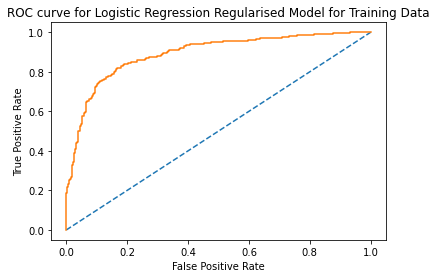

In [78]:
# predict probabilities
probs_LogR_reg_train = LogR_base_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_LogR_reg_train = probs_LogR_reg_train[:, 1]
# calculate AUC
LogR_reg_train_auc = roc_auc_score(y_train, probs_LogR_reg_train)
print('AUC: %.3f' % LogR_reg_train_auc)
# calculate roc curve
plt.title('ROC curve for Logistic Regression Regularised Model for Training Data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
train_fpr_LogR_reg, train_tpr_LogR_reg, train_thresholds_LogR_reg = roc_curve(y_train, probs_LogR_reg_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr_LogR_reg, train_tpr_LogR_reg);

AUC: 0.883


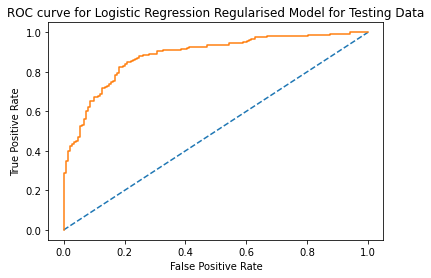

In [79]:
# predict probabilities
probs_LogR_reg_test = model_reg_LogR.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_LogR_reg_test = probs_LogR_reg_test[:, 1]
# calculate AUC
LogR_reg_test_auc = roc_auc_score(y_test, probs_LogR_reg_test)
print('AUC: %.3f' % LogR_reg_test_auc)
# calculate roc curve
test_fpr_LogR_reg, test_tpr_LogR_reg, test_thresholds_LogR_reg = roc_curve(y_test, probs_LogR_reg_test)
plt.title('ROC curve for Logistic Regression Regularised Model for Testing Data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr_LogR_reg, test_tpr_LogR_reg);

## Applying Grid Seacrh CV on Logistic Regression

In [90]:
from sklearn.model_selection import GridSearchCV

grid={'penalty':['l1','l2','none','elasticnet'],
      'solver':['lbfgs', 'liblinear','newton-cg'],
      'tol':[0.0001,0.000001,0.001]     }

In [91]:
model_LogR = LogisticRegression(max_iter=100000,n_jobs=5, C=1.0)

In [92]:
grid_search = GridSearchCV(estimator = model_LogR, param_grid = grid, cv = 5,n_jobs=-1,scoring='f1')

In [93]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=100000, n_jobs=5),
             n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2', 'none', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg'],
                         'tol': [0.0001, 1e-06, 0.001]},
             scoring='f1')

In [95]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.0001} 

LogisticRegression(max_iter=100000, n_jobs=5)


In [96]:
best_model_LogR = grid_search.best_estimator_

In [97]:
ytrain_predict_best_LogR = best_model_LogR.predict(X_train)
ytest_predict_best_LogR = best_model_LogR.predict(X_test)

In [98]:
ytest_predict_prob_best_LogR=best_model_LogR.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob_best_LogR).head()

0         1
0  0.423790  0.576210
1  0.150104  0.849896
2  0.007470  0.992530
3  0.833130  0.166870
4  0.069756  0.930244

In [99]:
confusion_matrix(y_train,ytrain_predict_best_LogR)

array([[196, 111],
       [ 68, 686]], dtype=int64)

In [100]:
print("Classification Report on Training Data for Logistic Regression \n\n",classification_report(y_train, ytrain_predict_best_LogR),'\n');

Classification Report on Training Data for Logistic Regression 

               precision    recall  f1-score   support

           0       0.74      0.64      0.69       307
           1       0.86      0.91      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.77      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 



In [101]:
confusion_matrix(y_test,ytest_predict_best_LogR)

array([[111,  42],
       [ 35, 268]], dtype=int64)

In [102]:
print("Classification Report on Testing Data for Logistic Regression\n \n",classification_report(y_test, ytest_predict_best_LogR),'\n');

Classification Report on Testing Data for Logistic Regression
 
               precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456
 



AUC: 0.890


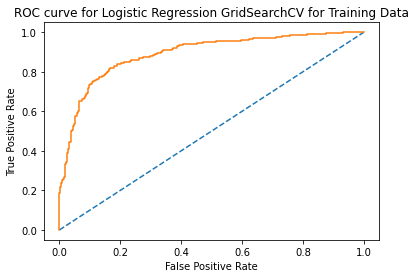

In [103]:
# predict probabilities
probs_LogR_CV_train = best_model_LogR.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_LogR_CV_train = probs_LogR_CV_train[:, 1]
# calculate AUC
LogR_CV_train_auc = roc_auc_score(y_train, probs_LogR_CV_train)
print('AUC: %.3f' % LogR_CV_train_auc)
# calculate roc curve
plt.title('ROC curve for Logistic Regression GridSearchCV for Training Data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
train_fpr_LogR_CV, train_tpr_LogR_CV, train_thresholds_LogR_CV = roc_curve(y_train, probs_LogR_CV_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr_LogR_CV, train_tpr_LogR_CV);

AUC: 0.883


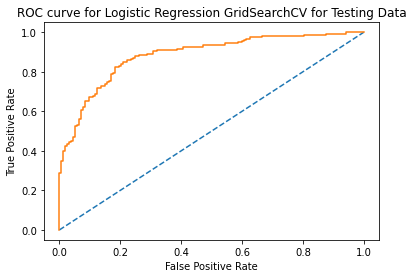

In [104]:
# predict probabilities
probs_LogR_CV_test = best_model_LogR.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_LogR_CV_test = probs_LogR_CV_test[:, 1]
# calculate AUC
LogR_CV_test_auc = roc_auc_score(y_test, probs_LogR_CV_test)
print('AUC: %.3f' % LogR_CV_test_auc)
# calculate roc curve
test_fpr_LogR_CV, test_tpr_LogR_CV, test_thresholds_LogR_CV = roc_curve(y_test, probs_LogR_CV_test)
plt.title('ROC curve for Logistic Regression GridSearchCV for Testing Data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr_LogR_CV, test_tpr_LogR_CV);

## Linear Discriminant Analysis

In [114]:
clf = LinearDiscriminantAnalysis()
model_LDA=clf.fit(X_train,y_train)

In [115]:
pred_class_train_LDA = model_LDA.predict(X_train)
pred_class_test_LDA = model_LDA.predict(X_test)

In [116]:
pred_prob_train_LDA = model_LDA.predict_proba(X_train)
pred_prob_test_LDA = model_LDA.predict_proba(X_test)

In [117]:
train_acc_LDA = model_LDA.score(X_train,y_train)
train_acc_LDA

0.8341187558906692

In [118]:
print('Classification Report on Training Data for LDA\n\n',metrics.classification_report(y_train,pred_class_train_LDA),'\n')

Classification Report on Training Data for LDA

               precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 



In [119]:
confusion_matrix(y_train, pred_class_train_LDA)

array([[200, 107],
       [ 69, 685]], dtype=int64)

In [120]:
print('Classification Report on Testing Data for LDA\n\n',metrics.classification_report(y_test,pred_class_test_LDA),'\n')

Classification Report on Testing Data for LDA

               precision    recall  f1-score   support

           0       0.77      0.73      0.74       153
           1       0.86      0.89      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456
 



In [121]:
confusion_matrix(y_test, pred_class_test_LDA)

array([[111,  42],
       [ 34, 269]], dtype=int64)

AUC: 0.889


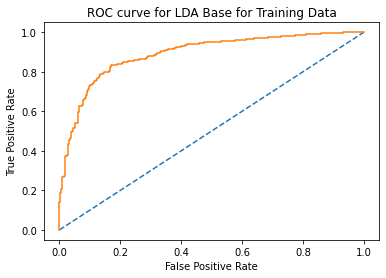

In [122]:
# predict probabilities
probs_LDA_train = model_LDA.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_LDA_train = probs_LDA_train[:, 1]
# calculate AUC
LDA_train_auc = roc_auc_score(y_train, probs_LDA_train)
print('AUC: %.3f' % LDA_train_auc)
# calculate roc curve
train_fpr_LDA_base, train_tpr_LDA_base, train_thresholds_LDA_base = roc_curve(y_train, probs_LDA_train)
plt.title('ROC curve for LDA Base for Training Data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr_LDA_base, train_tpr_LDA_base);

AUC: 0.888


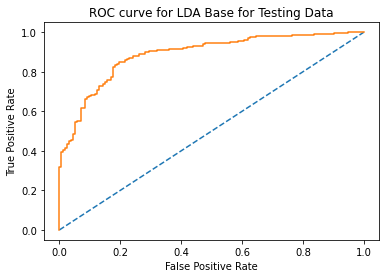

In [123]:
# predict probabilities
probs_LDA_test = model_LDA.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_LDA_test = probs_LDA_test[:, 1]
# calculate AUC
LDA_test_auc = roc_auc_score(y_test, probs_LDA_test)
print('AUC: %.3f' % LDA_test_auc)
# calculate roc curve
test_fpr_LDA_base, test_tpr_LDA_base, test_thresholds_LDA_base = roc_curve(y_test, probs_LDA_test)
plt.title('ROC curve for LDA Base for Testing Data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr_LDA_base, test_tpr_LDA_base);

## Applying GridSearchCV on LDA

In [124]:
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import arange
best_model_LDA = LinearDiscriminantAnalysis()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [125]:
grid['shrinkage'] = arange(0, 1, 0.01)
grid = dict()
grid['solver'] = ['svd', 'lsqr', 'eigen']
search = GridSearchCV(best_model_LDA, grid, scoring='accuracy', cv=cv, n_jobs=-1)
results = search.fit(X_train, y_train)

In [126]:
print(results.best_estimator_)

LinearDiscriminantAnalysis()


In [127]:
ytrain_predict = results.predict(X_train)
ytest_predict = results.predict(X_test)

In [128]:
ytest_predict_prob=results.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

0         1
0  0.462093  0.537907
1  0.133955  0.866045
2  0.006414  0.993586
3  0.861210  0.138790
4  0.056545  0.943455

In [129]:
results.get_params (deep = True)

{'cv': RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
 'error_score': nan,
 'estimator__covariance_estimator': None,
 'estimator__n_components': None,
 'estimator__priors': None,
 'estimator__shrinkage': None,
 'estimator__solver': 'svd',
 'estimator__store_covariance': False,
 'estimator__tol': 0.0001,
 'estimator': LinearDiscriminantAnalysis(),
 'n_jobs': -1,
 'param_grid': {'solver': ['svd', 'lsqr', 'eigen']},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': 'accuracy',
 'verbose': 0}

In [130]:
best_model_LDA.get_params(deep=True)

{'covariance_estimator': None,
 'n_components': None,
 'priors': None,
 'shrinkage': None,
 'solver': 'svd',
 'store_covariance': False,
 'tol': 0.0001}

In [131]:
confusion_matrix(y_train, ytrain_predict)

array([[200, 107],
       [ 69, 685]], dtype=int64)

In [132]:
print("Classification Report on Training Data for LDA\n \n",classification_report(y_train, ytrain_predict),'\n');

Classification Report on Training Data for LDA
 
               precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 



In [133]:
print("Classification Report on Testing Data for LDA\n \n",classification_report(y_test, ytest_predict),'\n');

Classification Report on Testing Data for LDA
 
               precision    recall  f1-score   support

           0       0.77      0.73      0.74       153
           1       0.86      0.89      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456
 



In [134]:
confusion_matrix(y_test, ytest_predict)

array([[111,  42],
       [ 34, 269]], dtype=int64)

AUC: 0.889


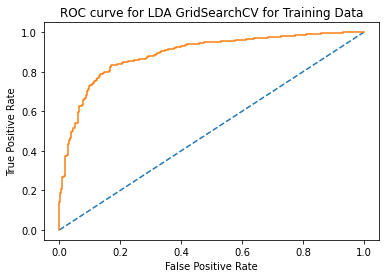

In [135]:
# predict probabilities
probs_LDA_CV_train = results.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_LDA_CV_train = probs_LDA_CV_train[:, 1]
# calculate AUC
LDA_CV_train_auc = roc_auc_score(y_train, probs_LDA_CV_train)
print('AUC: %.3f' % LDA_CV_train_auc)
# calculate roc curve
train_fpr_LDA_CV, train_tpr_LDA_CV, train_thresholds_LDA_CV = roc_curve(y_train, probs_LDA_CV_train)
plt.title('ROC curve for LDA GridSearchCV for Training Data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr_LDA_CV, train_tpr_LDA_CV);

AUC: 0.888


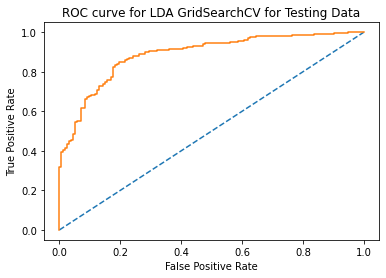

In [136]:
# predict probabilities
probs_LDA_CV_test = results.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_LDA_CV_test = probs_LDA_CV_test[:, 1]
# calculate AUC
LDA_CV_test_auc = roc_auc_score(y_test, probs_LDA_CV_test)
print('AUC: %.3f' % LDA_CV_test_auc)
# calculate roc curve
test_fpr_LDA_CV, test_tpr_LDA_CV, test_thresholds_LDA_CV = roc_curve(y_test, probs_LDA_CV_test)
plt.title('ROC curve for LDA GridSearchCV for Testing Data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr_LDA_CV, test_tpr_LDA_CV);

## 1.5 Apply KNN Model and Naïve Bayes Model. Interpret the results.
### Naïve Bayes Model

In [137]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [138]:
y_train_predict = NB_model.predict(X_train)
y_test_predict = NB_model.predict(X_test)

In [139]:
print(metrics.confusion_matrix(y_train, y_train_predict))  
print('Classification Report on Training Data for Gaussian NB \n\n', metrics.classification_report(y_train, y_train_predict))  

[[211  96]
 [ 79 675]]
Classification Report on Training Data for Gaussian NB 

               precision    recall  f1-score   support

           0       0.73      0.69      0.71       307
           1       0.88      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061



In [140]:
print(metrics.confusion_matrix(y_test, y_test_predict))         
print("Classification Report on Testing Data for Gaussian NB \n\n",metrics.classification_report(y_test, y_test_predict))    

[[112  41]
 [ 40 263]]
Classification Report on Testing Data for Gaussian NB 

               precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



In [141]:
from sklearn.inspection import permutation_importance

In [145]:
imps = permutation_importance(NB_model, X_test, y_test)
importances = imps.importances_mean
std = imps.importances_std
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(X_test.shape[1]):
    print("%d. %s (%f)" % (f + 1, df.columns[indices[f]], importances[indices[f]]))


Feature ranking:
1. Blair (0.055263)
2. Hague (0.044298)
3. economic_cond_household (0.035088)
4. Europe (0.018860)
5. age (0.017105)
6. vote (0.007456)
7. economic_cond_national (0.003070)
8. political_knowledge (-0.003947)


AUC: 0.888


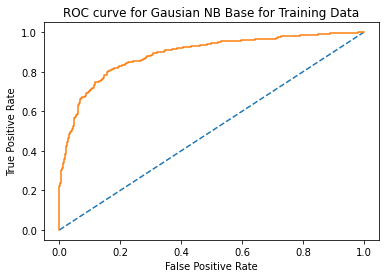

In [143]:
# predict probabilities
probs_GNB_base_train = NB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_GNB_base_train = probs_GNB_base_train[:, 1]
# calculate AUC
GNB_base_train_auc = roc_auc_score(y_train, probs_GNB_base_train)
print('AUC: %.3f' % GNB_base_train_auc)
# calculate roc curve
train_fpr_GNB_base, train_tpr_GNB_base, train_thresholds_GNB_base = roc_curve(y_train, probs_GNB_base_train)
plt.title('ROC curve for Gausian NB Base for Training Data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr_GNB_base, train_tpr_GNB_base);

AUC: 0.876


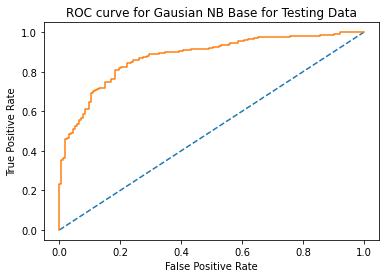

In [144]:
# predict probabilities
probs_GNB_base_test = NB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_GNB_base_test = probs_GNB_base_test[:, 1]
# calculate AUC
GNB_base_test_auc = roc_auc_score(y_test, probs_GNB_base_test)
print('AUC: %.3f' % GNB_base_test_auc)
# calculate roc curve
test_fpr_GNB_base, test_tpr_GNB_base, test_thresholds_GNB_base = roc_curve(y_test, probs_GNB_base_test)
plt.title('ROC curve for Gausian NB Base for Testing Data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr_GNB_base, test_tpr_GNB_base);

## Applying GridSearchCV on Gausian Naive Bayes

In [146]:
cv_method = RepeatedStratifiedKFold(n_splits=10, 
                                    n_repeats=5, 
                                    random_state=1)

In [147]:
from sklearn.preprocessing import PowerTransformer
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

BestModel_NB = GridSearchCV(estimator=NB_model, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

Data_transformed = PowerTransformer().fit_transform(X_test)

BestModel_NB.fit(Data_transformed, y_test);

Fitting 50 folds for each of 100 candidates, totalling 5000 fits


In [148]:
BestModel_NB.best_params_

{'var_smoothing': 0.657933224657568}

In [149]:
BestModel_NB.best_score_

0.8246280193236715

In [150]:
results_NB = pd.DataFrame(BestModel_NB.cv_results_['params'])
results_NB['test_score'] = BestModel_NB.cv_results_['mean_test_score']

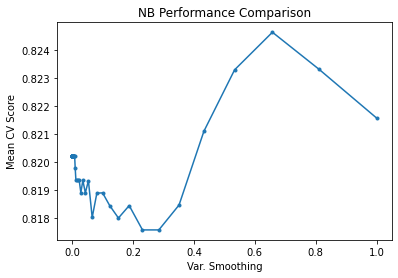

In [151]:
plt.plot(results_NB['var_smoothing'], results_NB['test_score'], marker = '.')    
plt.xlabel('Var. Smoothing')
plt.ylabel("Mean CV Score")
plt.title("NB Performance Comparison")
plt.show()

In [152]:
# predict the target on the test dataset
from sklearn.metrics import accuracy_score
predict_test = BestModel_NB.predict(Data_transformed)
# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on test dataset :  0.831140350877193


In [153]:
ytrain_predict_BestModel_NB = BestModel_NB.predict(X_train)
ytest_predict_BestModel_NB = BestModel_NB.predict(X_test)

In [154]:
ytest_predict_prob_BestModel_NB=BestModel_NB.predict_proba(X_test)

In [155]:
print(classification_report(y_train, ytrain_predict_BestModel_NB),'\n');

              precision    recall  f1-score   support

           0       0.73      0.70      0.71       307
           1       0.88      0.89      0.89       754

    accuracy                           0.84      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.84      0.84      1061
 



In [156]:
confusion_matrix(y_train, ytrain_predict_BestModel_NB)

array([[214,  93],
       [ 81, 673]], dtype=int64)

In [157]:
print(classification_report(y_test, ytest_predict_BestModel_NB),'\n');

              precision    recall  f1-score   support

           0       0.75      0.75      0.75       153
           1       0.87      0.87      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456
 



In [158]:
confusion_matrix(y_test, ytest_predict_BestModel_NB)

array([[115,  38],
       [ 39, 264]], dtype=int64)

In [161]:
imps = permutation_importance(BestModel_NB, X_test, y_test)
importances = imps.importances_mean
std = imps.importances_std
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(X_test.shape[1]):
    print("%d. %s (%f)" % (f + 1, df.columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. Blair (0.092544)
2. Hague (0.053509)
3. economic_cond_household (0.046491)
4. Europe (0.025877)
5. age (0.017982)
6. vote (0.015789)
7. economic_cond_national (0.003947)
8. political_knowledge (0.001316)


AUC: 0.888


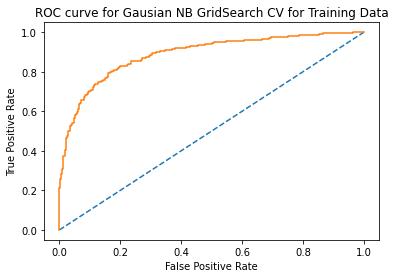

In [160]:
# predict probabilities
probs_GNB_CV_train = BestModel_NB.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_GNB_CV_train = probs_GNB_CV_train[:, 1]
# calculate AUC
GNB_CV_train_auc = roc_auc_score(y_train, probs_GNB_CV_train)
print('AUC: %.3f' % GNB_CV_train_auc)
# calculate roc curve
train_fpr_GNB_CV, train_tpr_GNB_CV, train_thresholds_GNB_CV = roc_curve(y_train, probs_GNB_CV_train)
plt.title('ROC curve for Gausian NB GridSearch CV for Training Data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr_GNB_CV, train_tpr_GNB_CV);

AUC: 0.882


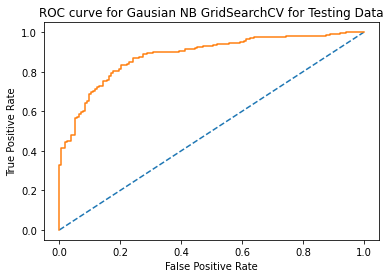

In [162]:
# predict probabilities
probs_GNB_CV_test = BestModel_NB.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_GNB_CV_test = probs_GNB_CV_test[:, 1]
# calculate AUC
GNB_CV_test_auc = roc_auc_score(y_test, probs_GNB_CV_test)
print('AUC: %.3f' % GNB_CV_test_auc)
# calculate roc curve
test_fpr_GNB_CV, test_tpr_GNB_CV, test_thresholds_GNB_CV = roc_curve(y_test, probs_GNB_CV_test)
plt.title('ROC curve for Gausian NB GridSearchCV for Testing Data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr_GNB_CV, test_tpr_GNB_CV);

## KNN

In [163]:
from sklearn.neighbors import KNeighborsClassifier

In [164]:
KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [165]:
## Performance Matrix on train data set
y_train_predict_KNN = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict_KNN))
print('Classification Report on Training Data for KNN \n\n',metrics.classification_report(y_train, y_train_predict_KNN))

0.8557964184731386
[[218  89]
 [ 64 690]]
Classification Report on Training Data for KNN 

               precision    recall  f1-score   support

           0       0.77      0.71      0.74       307
           1       0.89      0.92      0.90       754

    accuracy                           0.86      1061
   macro avg       0.83      0.81      0.82      1061
weighted avg       0.85      0.86      0.85      1061



In [166]:
## Performance Matrix on test data set
y_test_predict_KNN = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict_KNN))
print("Classification Report on Testing Data for KNN \n \n",metrics.classification_report(y_test, y_test_predict_KNN))

0.8245614035087719
[[105  48]
 [ 32 271]]
Classification Report on Testing Data for KNN 
 
               precision    recall  f1-score   support

           0       0.77      0.69      0.72       153
           1       0.85      0.89      0.87       303

    accuracy                           0.82       456
   macro avg       0.81      0.79      0.80       456
weighted avg       0.82      0.82      0.82       456



AUC: 0.927


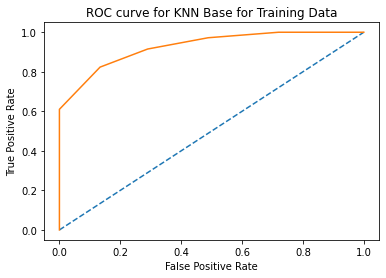

In [168]:
# predict probabilities
probs_KNN_base_train = KNN_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_KNN_base_train = probs_KNN_base_train[:, 1]
# calculate AUC
KNN_base_train_auc = roc_auc_score(y_train, probs_KNN_base_train)
print('AUC: %.3f' % KNN_base_train_auc)
# calculate roc curve
train_fpr_KNN_base, train_tpr_KNN_base, train_thresholds_KNN_base = roc_curve(y_train, probs_KNN_base_train)
plt.title('ROC curve for KNN Base for Training Data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr_KNN_base, train_tpr_KNN_base);

AUC: 0.870


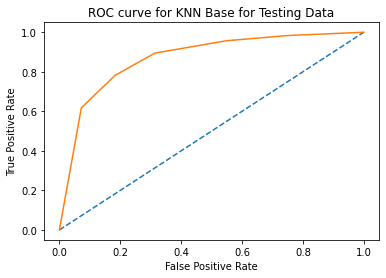

In [169]:
# predict probabilities
probs_KNN_base_test = KNN_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_KNN_base_test = probs_KNN_base_test[:, 1]
# calculate AUC
KNN_base_test_auc = roc_auc_score(y_test, probs_KNN_base_test)
print('AUC: %.3f' % KNN_base_test_auc)
# calculate roc curve
test_fpr_KNN_base, test_tpr_KNN_base, test_thresholds_KNN_base = roc_curve(y_test, probs_KNN_base_test)
plt.title('ROC curve for KNN Base for Testing Data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr_KNN_base, test_tpr_KNN_base)

## Applying GridSearch CV on KNN

In [181]:
params_KNN = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7], 
              'p': [1, 2, 5]}
# we need to define a dictionary of KNN parameters for the grid search. Here, we will consider K values between 3 and 7 and 
# p values of 1 (Manhattan), 2 (Euclidean), and 5 (Minkowski).

In [182]:
cv_method = RepeatedStratifiedKFold(n_splits=10, 
                                    n_repeats=5, 
                                    random_state=1)

In [183]:
gs_KNN = GridSearchCV(estimator=KNeighborsClassifier(), 
                      param_grid=params_KNN, 
                      cv=cv_method,
                      verbose=1,  # verbose: the higher, the more messages
                      scoring='accuracy', 
                      return_train_score=True)

#we pass the KNeighborsClassifier() and KNN_params as the model and the parameter dictionary into the GridSearchCV function. In addition, we include the repeated stratified CV method we defined previously (cv=cv_method). Also, we tell sklearn which metric to optimize, which is accuracy in our example (scoring='accuracy', refit='accuracy').

In [184]:
gs_KNN.fit(X_train, y_train)

Fitting 50 folds for each of 21 candidates, totalling 1050 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=10, random_state=1),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7], 'p': [1, 2, 5]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [185]:
gs_KNN.best_params_
#To get the best parameter values, we call the best_params_ attribute.

{'n_neighbors': 7, 'p': 5}

In [186]:
#Redefining neighbours

params_KNN = {'n_neighbors': [6, 7,9,11,13,15], 
              'p': [1, 2, 5]}

In [187]:
cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=5, 
                                    random_state=1)

In [188]:
gs_KNN1 = GridSearchCV(estimator=KNeighborsClassifier(), 
                      param_grid=params_KNN, 
                      cv=cv_method,
                      verbose=1,  # verbose: the higher, the more messages
                      scoring='accuracy', 
                      return_train_score=True)

In [189]:
gs_KNN1.fit(X_train, y_train)

Fitting 25 folds for each of 18 candidates, totalling 450 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=5, random_state=1),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [6, 7, 9, 11, 13, 15], 'p': [1, 2, 5]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [190]:
gs_KNN1.best_params_

{'n_neighbors': 15, 'p': 1}

In [191]:
params_KNN = {'n_neighbors': [13,15,17,19,21], 
              'p': [1, 2, 5]}

In [192]:
cv_method = RepeatedStratifiedKFold(n_splits=3, 
                                    n_repeats=5, 
                                    random_state=1)

In [193]:
gs_KNN2 = GridSearchCV(estimator=KNeighborsClassifier(), 
                      param_grid=params_KNN, 
                      cv=cv_method,
                      verbose=1,  # verbose: the higher, the more messages
                      scoring='accuracy', 
                      return_train_score=True)

In [194]:
gs_KNN2.fit(X_train, y_train)

Fitting 15 folds for each of 15 candidates, totalling 225 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=3, random_state=1),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [13, 15, 17, 19, 21], 'p': [1, 2, 5]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [195]:
gs_KNN2.best_params_

{'n_neighbors': 17, 'p': 1}

In [196]:
gs_KNN.best_score_

0.8175365896667253

In [197]:
gs_KNN1.best_score_

0.8233687660554523

In [198]:
gs_KNN2.best_score_

0.8241294686918156

In [199]:
gs_KNN2.cv_results_['mean_test_score']
 #To extract more cross-validation results, we can call gs.csv_results - a dictionary consisting of run details for each fold.

array([0.81997727, 0.81394931, 0.80829692, 0.82129927, 0.81734341,
       0.81545803, 0.82412947, 0.81903992, 0.81583255, 0.82261861,
       0.8214908 , 0.81696462, 0.81960169, 0.82073644, 0.81526971])

In [200]:
results_KNN = pd.DataFrame(gs_KNN2.cv_results_['params'])
results_KNN['test_score'] = gs_KNN2.cv_results_['mean_test_score']

In [201]:
results_KNN['metric'] = results_KNN['p'].replace([1,2,5], ["Manhattan", "Euclidean", "Minkowski"])
results_KNN


n_neighbors  p  test_score     metric
0            13  1    0.819977  Manhattan
1            13  2    0.813949  Euclidean
2            13  5    0.808297  Minkowski
3            15  1    0.821299  Manhattan
4            15  2    0.817343  Euclidean
5            15  5    0.815458  Minkowski
6            17  1    0.824129  Manhattan
7            17  2    0.819040  Euclidean
8            17  5    0.815833  Minkowski
9            19  1    0.822619  Manhattan
10           19  2    0.821491  Euclidean
11           19  5    0.816965  Minkowski
12           21  1    0.819602  Manhattan
13           21  2    0.820736  Euclidean
14           21  5    0.815270  Minkowski

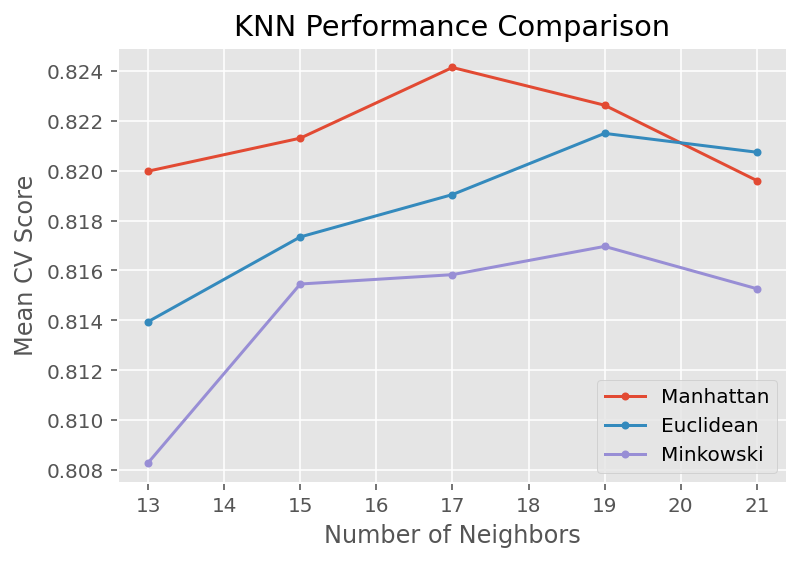

In [202]:
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

for i in ["Manhattan", "Euclidean", "Minkowski"]:
    temp = results_KNN[results_KNN['metric'] == i]
    plt.plot(temp['n_neighbors'], temp['test_score'], marker = '.', label = i)
    
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel("Mean CV Score")
plt.title("KNN Performance Comparison")
plt.show()

In [203]:
## Performance Matrix on train data set
y_train_predict_KNN7 = gs_KNN2.predict(X_train)
model_score = gs_KNN2.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict_KNN7))
print('Classification Report on Training Data for KNN for K=17 \n\n',metrics.classification_report(y_train, y_train_predict_KNN7))

0.8388312912346843
[[202 105]
 [ 66 688]]
Classification Report on Training Data for KNN for K=17 

               precision    recall  f1-score   support

           0       0.75      0.66      0.70       307
           1       0.87      0.91      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.83      0.84      0.84      1061



In [204]:
## Performance Matrix on test data set
y_test_predict_KNN7 = gs_KNN2.predict(X_test)
model_score = gs_KNN2.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print('Classification Report on Testing Data for KNN for K=17 \n\n',metrics.classification_report(y_test, y_test_predict_KNN7))

0.8245614035087719
[[112  41]
 [ 40 263]]
Classification Report on Testing Data for KNN for K=17 

               precision    recall  f1-score   support

           0       0.78      0.67      0.72       153
           1       0.84      0.90      0.87       303

    accuracy                           0.82       456
   macro avg       0.81      0.79      0.80       456
weighted avg       0.82      0.82      0.82       456



In [206]:
imps = permutation_importance(gs_KNN2, X_test, y_test)
importances = imps.importances_mean
std = imps.importances_std
indices = np.argsort(importances)[::-1]
importances
print("Feature ranking:")
for f in range(X_test.shape[1]):
    print("%d. %s (%f)" % (f + 1, df.columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. Blair (0.060526)
2. Europe (0.047368)
3. Hague (0.032018)
4. economic_cond_household (0.027193)
5. vote (0.009211)
6. political_knowledge (0.004825)
7. age (0.000000)
8. economic_cond_national (-0.007018)


AUC: 0.907


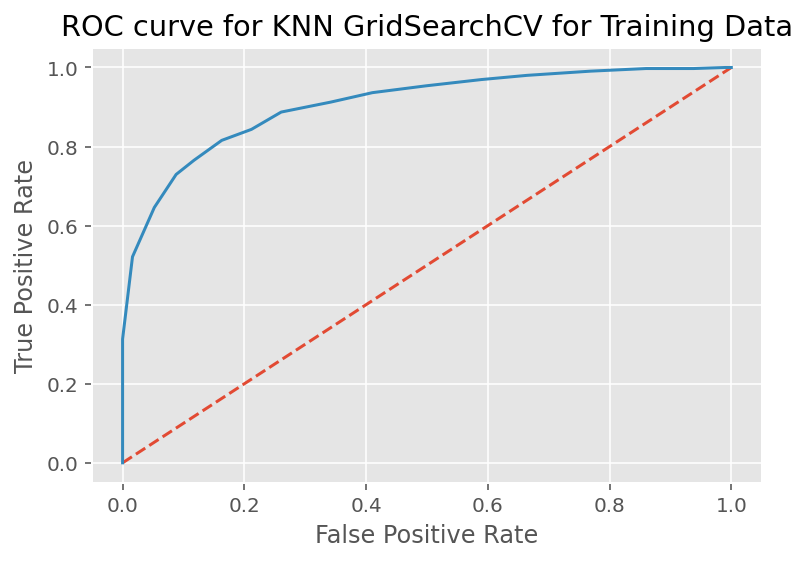

In [207]:
# predict probabilities
probs_KNN_CV_train = gs_KNN2.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_KNN_CV_train = probs_KNN_CV_train[:, 1]
# calculate AUC
KNN_CV_train_auc = roc_auc_score(y_train, probs_KNN_CV_train)
print('AUC: %.3f' % KNN_CV_train_auc)
# calculate roc curve
train_fpr_KNN_CV, train_tpr_KNN_CV, train_thresholds_KNN_CV = roc_curve(y_train, probs_KNN_CV_train)
plt.title('ROC curve for KNN GridSearchCV for Training Data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr_KNN_CV, train_tpr_KNN_CV);

AUC: 0.889


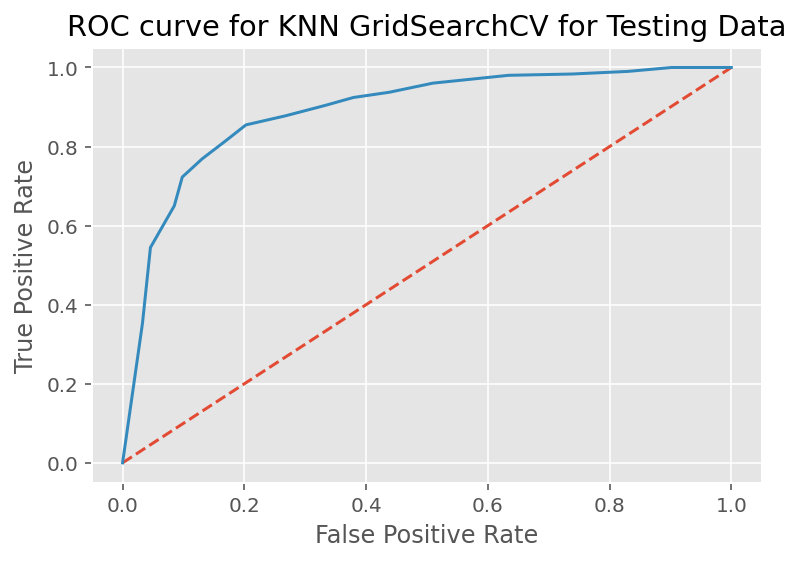

In [208]:
# predict probabilities
probs_KNN_CV_test = gs_KNN2.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_KNN_CV_test = probs_KNN_CV_test[:, 1]
# calculate AUC
KNN_CV_test_auc = roc_auc_score(y_test, probs_KNN_CV_test)
print('AUC: %.3f' % KNN_CV_test_auc)
# calculate roc curve
test_fpr_KNN_CV, test_tpr_KNN_CV, test_thresholds_KNN_CV = roc_curve(y_test, probs_KNN_CV_test)
plt.title('ROC curve for KNN GridSearchCV for Testing Data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr_KNN_CV, test_tpr_KNN_CV);

## 1.6 Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting.
### Bagging

In [209]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

RF = RandomForestClassifier()
Bagging_model=BaggingClassifier(base_estimator=RF,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=100,
                  random_state=1)

In [210]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9679547596606974
[[278  29]
 [  5 749]]
              precision    recall  f1-score   support

           0       0.98      0.91      0.94       307
           1       0.96      0.99      0.98       754

    accuracy                           0.97      1061
   macro avg       0.97      0.95      0.96      1061
weighted avg       0.97      0.97      0.97      1061



In [211]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8289473684210527
[[104  49]
 [ 29 274]]
              precision    recall  f1-score   support

           0       0.78      0.68      0.73       153
           1       0.85      0.90      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



AUC: 0.997


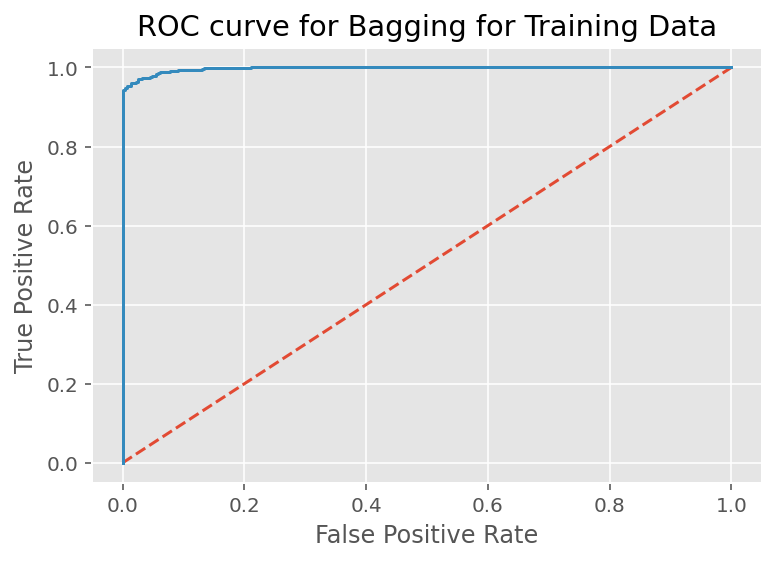

In [212]:
# predict probabilities
probs_bagging_train = Bagging_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_bagging_train = probs_bagging_train[:, 1]
# calculate AUC
bagging_train_auc = roc_auc_score(y_train, probs_bagging_train)
print('AUC: %.3f' % bagging_train_auc)
# calculate roc curve
train_fpr_bag, train_tpr_bag, train_thresholds_bag = roc_curve(y_train, probs_bagging_train)
plt.title('ROC curve for Bagging for Training Data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr_bag, train_tpr_bag);

AUC: 0.896


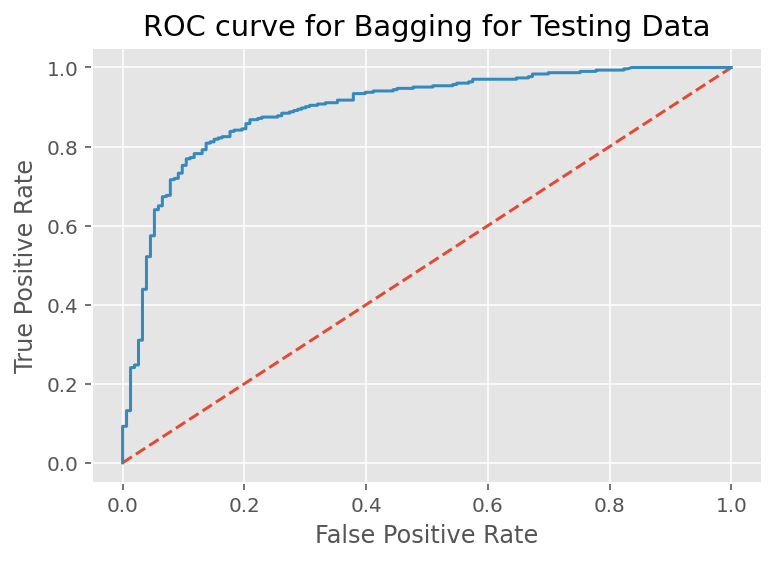

In [213]:
# predict probabilities
probs_bagging_test = Bagging_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_bagging_test = probs_bagging_test[:, 1]
# calculate AUC
bagging_test_auc = roc_auc_score(y_test, probs_bagging_test)
print('AUC: %.3f' % bagging_test_auc)
# calculate roc curve
test_fpr_bag, test_tpr_bag, test_thresholds_bag = roc_curve(y_test, probs_bagging_test)
plt.title('ROC curve for Bagging for Testing Data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr_bag, test_tpr_bag);

## Gradient Boosting

In [214]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [215]:
y_train_predict = gbcl.predict(X_train)
model_score_GraBoosting_train = gbcl.score(X_train, y_train)
print(model_score_GraBoosting_train)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8925541941564562
[[239  68]
 [ 46 708]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       307
           1       0.91      0.94      0.93       754

    accuracy                           0.89      1061
   macro avg       0.88      0.86      0.87      1061
weighted avg       0.89      0.89      0.89      1061



In [216]:
y_test_predict = gbcl.predict(X_test)
model_score_GraBoosting_test = gbcl.score(X_test, y_test)
print(model_score_GraBoosting_test)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8355263157894737
[[105  48]
 [ 27 276]]
              precision    recall  f1-score   support

           0       0.80      0.69      0.74       153
           1       0.85      0.91      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.83      0.84      0.83       456



AUC: 0.951


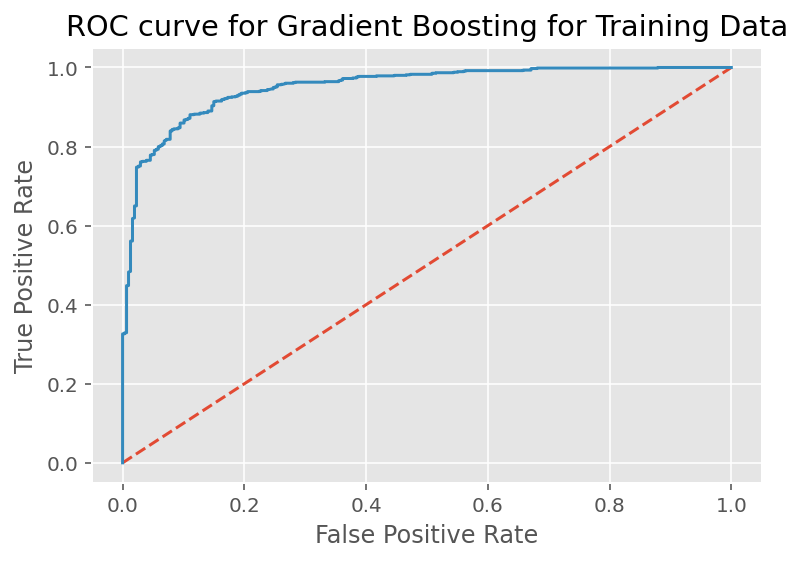

In [217]:
# predict probabilities
probs_gb_train = gbcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_gb_train = probs_gb_train[:, 1]
# calculate AUC
gb_train_auc = roc_auc_score(y_train, probs_gb_train)
print('AUC: %.3f' % gb_train_auc)
# calculate roc curve
train_fpr_gb, train_tpr_gb, train_thresholds_gb = roc_curve(y_train, probs_gb_train)
plt.title('ROC curve for Gradient Boosting for Training Data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr_gb, train_tpr_gb);

AUC: 0.899


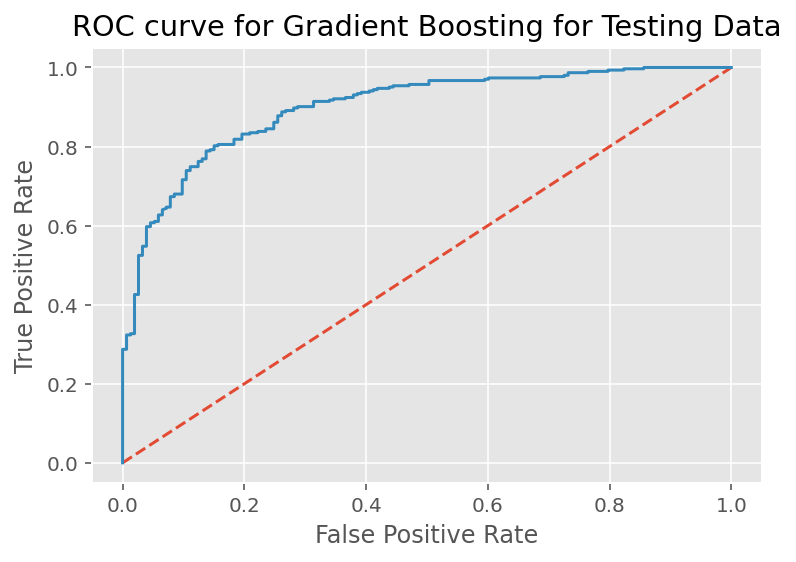

In [219]:
# predict probabilities
probs_gb_test = gbcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_gb_test = probs_gb_test[:, 1]
# calculate AUC
gb_test_auc = roc_auc_score(y_test, probs_gb_test)
print('AUC: %.3f' % gb_test_auc)
# calculate roc curve
test_fpr_gb, test_tpr_gb, test_thresholds_gb = roc_curve(y_test, probs_gb_test)
plt.title('ROC curve for Gradient Boosting for Testing Data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr_gb, test_tpr_gb);

## Ada Boosting

In [220]:
from sklearn.ensemble import AdaBoostClassifier
ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [221]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(X_train)
model_score_AdaBoosting_train = ADB_model.score(X_train, y_train)
print(model_score_AdaBoosting_train)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8501413760603205
[[214  93]
 [ 66 688]]
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       307
           1       0.88      0.91      0.90       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061



In [222]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_test)
model_score_AdaBoosting_test = ADB_model.score(X_test, y_test)
print(model_score_AdaBoosting_test)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8135964912280702
[[103  50]
 [ 35 268]]
              precision    recall  f1-score   support

           0       0.75      0.67      0.71       153
           1       0.84      0.88      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.81      0.81      0.81       456



AUC: 0.915


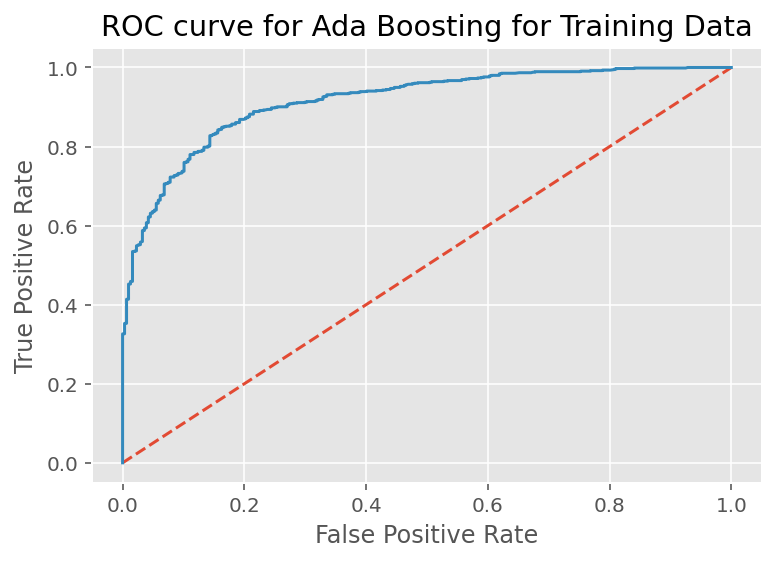

In [223]:
# predict probabilities
probs_adab_train = ADB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_adab_train = probs_adab_train[:, 1]
# calculate AUC
adb_train_auc = roc_auc_score(y_train, probs_adab_train)
print('AUC: %.3f' % adb_train_auc)
# calculate roc curve
train_fpr_adb, train_tpr_adb, train_thresholds_adb = roc_curve(y_train, probs_adab_train)
plt.title('ROC curve for Ada Boosting for Training Data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr_adb, train_tpr_adb);

AUC: 0.877


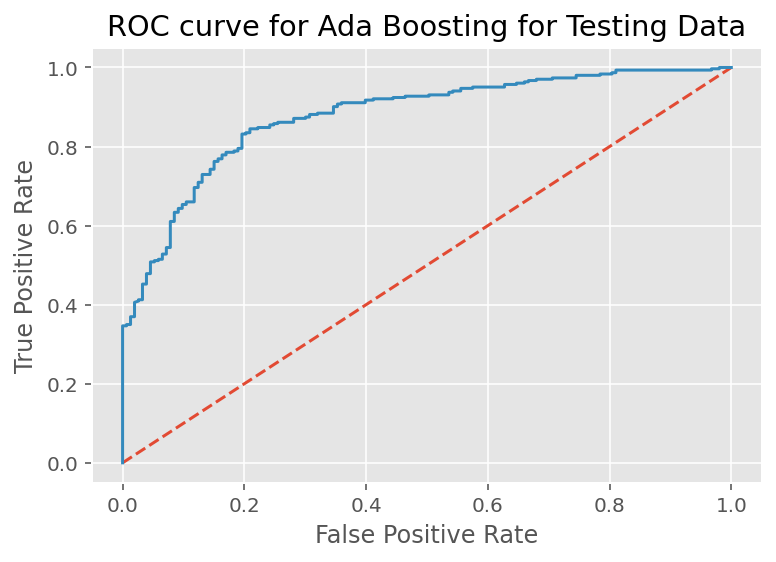

In [224]:
# predict probabilities
probs_adab_test = ADB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_adab_test = probs_adab_test[:, 1]
# calculate AUC
adb_test_auc = roc_auc_score(y_test, probs_adab_test)
print('AUC: %.3f' % adb_test_auc)
# calculate roc curve
test_fpr_adb, test_tpr_adb, test_thresholds_adb = roc_curve(y_test, probs_adab_test)
plt.title('ROC curve for Ada Boosting for Testing Data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr_adb, test_tpr_adb);

## SMOTE

In [229]:
sm = SMOTE(random_state=1)

In [230]:
X_train_res, y_train_res = sm.fit_resample(X_train,y_train.ravel())

In [231]:
X_train_res.shape

(1508, 8)

In [232]:
y_train_res.shape

(1508,)

## Logistic Regression with SMOTE

In [233]:
LogSMOTE_model = LogisticRegression()

In [234]:
LogSMOTE_model.fit(X_train_res, y_train_res)

LogisticRegression()

In [235]:
y_train_predict = LogSMOTE_model.predict(X_train_res)
model_score_LogRSMOTE_train = LogSMOTE_model.score(X_train_res, y_train_res)
print(model_score_LogRSMOTE_train)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res ,y_train_predict))

0.8368700265251989
[[636 118]
 [128 626]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       754
           1       0.84      0.83      0.84       754

    accuracy                           0.84      1508
   macro avg       0.84      0.84      0.84      1508
weighted avg       0.84      0.84      0.84      1508



In [236]:
## Performance Matrix on test data set
y_test_predict = LogSMOTE_model.predict(X_test)
model_score_LogRSMOTE_test = LogSMOTE_model.score(X_test, y_test)
print(model_score_LogRSMOTE_test)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8114035087719298
[[127  26]
 [ 60 243]]
              precision    recall  f1-score   support

           0       0.68      0.83      0.75       153
           1       0.90      0.80      0.85       303

    accuracy                           0.81       456
   macro avg       0.79      0.82      0.80       456
weighted avg       0.83      0.81      0.82       456



AUC: 0.890


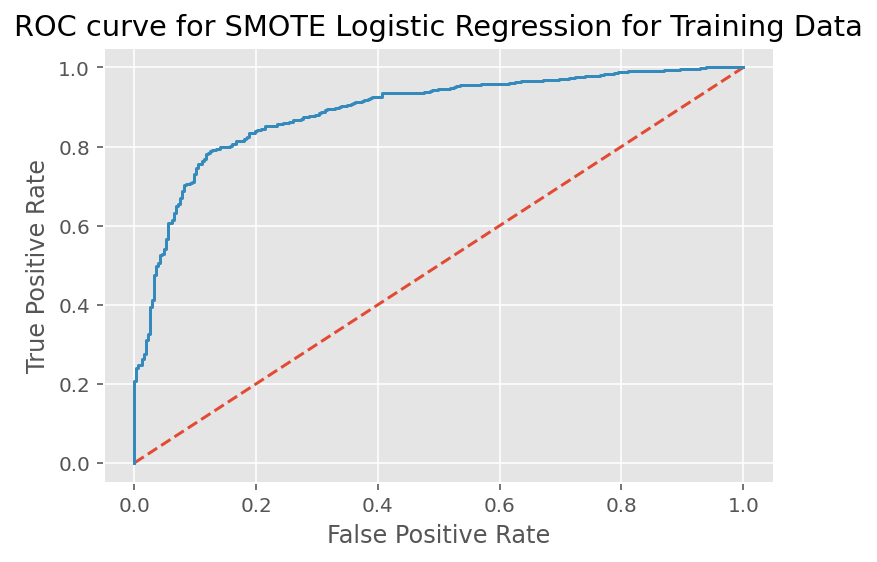

In [237]:
# predict probabilities
probs_logsm_train = LogSMOTE_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_logsm_train = probs_logsm_train[:, 1]
# calculate AUC
logsm_train_auc = roc_auc_score(y_train, probs_logsm_train)
print('AUC: %.3f' % logsm_train_auc)
# calculate roc curve
train_fpr_logsm, train_tpr_logsm, train_thresholds_logsm = roc_curve(y_train, probs_logsm_train)
plt.title('ROC curve for SMOTE Logistic Regression for Training Data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr_logsm, train_tpr_logsm);

AUC: 0.890


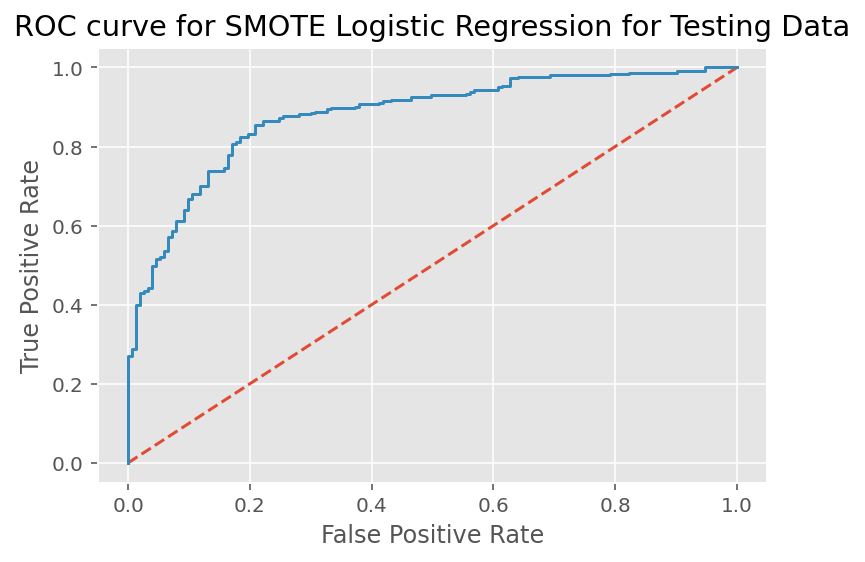

In [238]:
# predict probabilities
probs_logsm_test = LogSMOTE_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_logsm_test = probs_logsm_test[:, 1]
# calculate AUC
logsm_test_auc = roc_auc_score(y_test, probs_logsm_test)
print('AUC: %.3f' % logsm_train_auc)
# calculate roc curve
test_fpr_logsm, test_tpr_logsm, test_thresholds_logsm = roc_curve(y_test, probs_logsm_test)
plt.title('ROC curve for SMOTE Logistic Regression for Testing Data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr_logsm, test_tpr_logsm);

AUC: 0.890


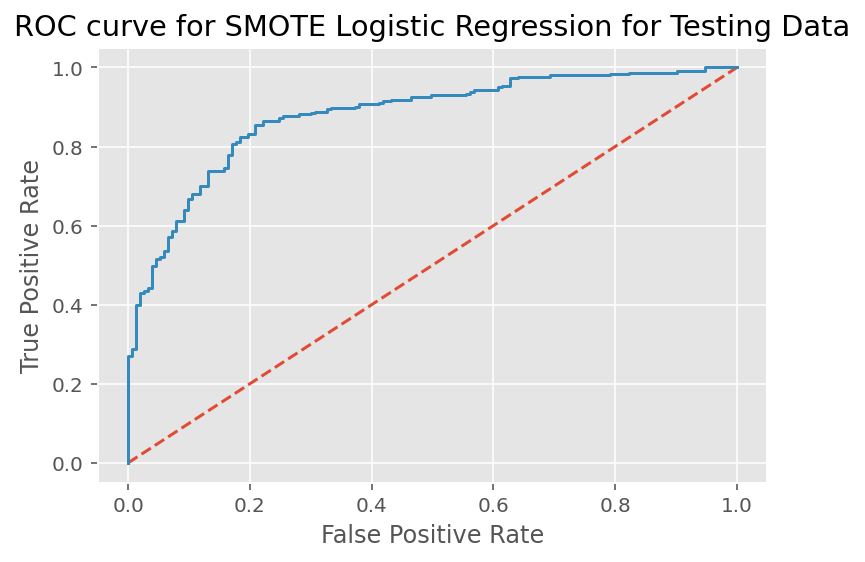

In [239]:
# predict probabilities
probs_logsm_test = LogSMOTE_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_logsm_test = probs_logsm_test[:, 1]
# calculate AUC
logsm_test_auc = roc_auc_score(y_test, probs_logsm_test)
print('AUC: %.3f' % logsm_train_auc)
# calculate roc curve
test_fpr_logsm, test_tpr_logsm, test_thresholds_logsm = roc_curve(y_test, probs_logsm_test)
plt.title('ROC curve for SMOTE Logistic Regression for Testing Data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr_logsm, test_tpr_logsm);

In [240]:
clf = LinearDiscriminantAnalysis()
LDA_smote=clf.fit(X_train_res, y_train_res)

In [241]:
y_train_predict_LDASMOTE_train = LDA_smote.predict(X_train_res)
model_score_LDASMOTE_train = LDA_smote.score(X_train_res, y_train_res)
print(model_score_LDASMOTE_train)
print(metrics.confusion_matrix(y_train_res, y_train_predict_LDASMOTE_train))
print(metrics.classification_report(y_train_res ,y_train_predict_LDASMOTE_train))

0.8381962864721485
[[640 114]
 [130 624]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       754
           1       0.85      0.83      0.84       754

    accuracy                           0.84      1508
   macro avg       0.84      0.84      0.84      1508
weighted avg       0.84      0.84      0.84      1508



In [242]:
## Performance Matrix on test data set
y_test_predict_LDASMOTE_test = LDA_smote.predict(X_test)
model_score_LDASMOTE_test = LDA_smote.score(X_test, y_test)
print(model_score_LDASMOTE_test)
print(metrics.confusion_matrix(y_test, y_test_predict_LDASMOTE_test))
print(metrics.classification_report(y_test, y_test_predict_LDASMOTE_test))

0.8048245614035088
[[128  25]
 [ 64 239]]
              precision    recall  f1-score   support

           0       0.67      0.84      0.74       153
           1       0.91      0.79      0.84       303

    accuracy                           0.80       456
   macro avg       0.79      0.81      0.79       456
weighted avg       0.83      0.80      0.81       456



AUC: 0.890


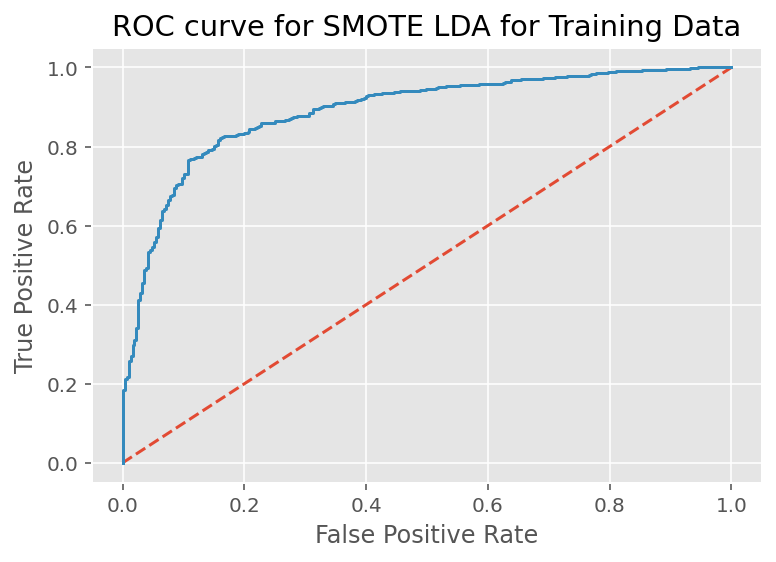

In [243]:
# predict probabilities
probs_ldasm_train = LDA_smote.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_ldasm_train = probs_ldasm_train[:, 1]
# calculate AUC
ldasm_train_auc = roc_auc_score(y_train, probs_ldasm_train)
print('AUC: %.3f' % logsm_train_auc)
# calculate roc curve
train_fpr_ldasm, train_tpr_ldasm, train_thresholds_ldasm = roc_curve(y_train, probs_ldasm_train)
plt.title('ROC curve for SMOTE LDA for Training Data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr_ldasm, train_tpr_ldasm);

AUC: 0.890


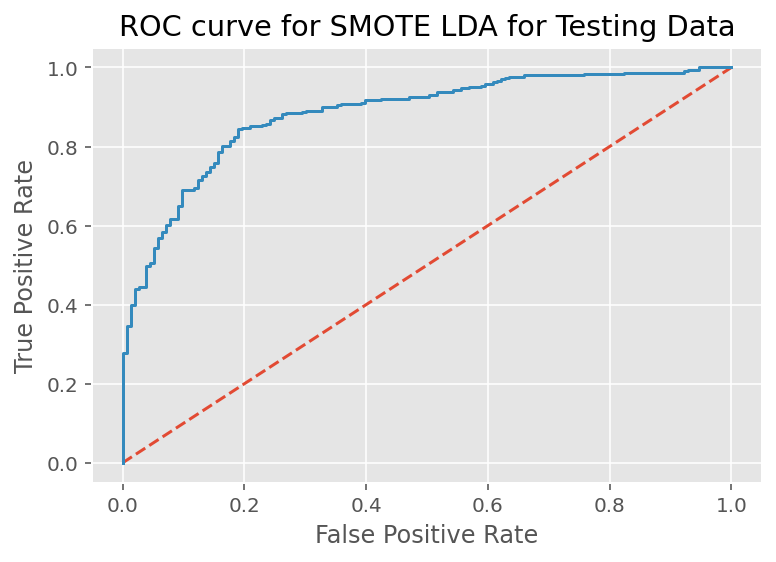

In [244]:
# predict probabilities
probs_ldasm_test = LDA_smote.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_ldasm_test = probs_ldasm_test[:, 1]
# calculate AUC
ldasm_test_auc = roc_auc_score(y_test, probs_ldasm_test)
print('AUC: %.3f' % logsm_train_auc)
# calculate roc curve
test_fpr_ldasm, test_tpr_ldasm, test_thresholds_ldasm = roc_curve(y_test, probs_ldasm_test)
plt.title('ROC curve for SMOTE LDA for Testing Data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr_ldasm, test_tpr_ldasm);

## KNN with SMOTE

In [245]:
from sklearn.neighbors import KNeighborsClassifier

KNN_SM_model=KNeighborsClassifier()
KNN_SM_model.fit(X_train_res,y_train_res)

KNeighborsClassifier()

In [246]:
## Performance Matrix on train data set
y_train_predict = KNN_SM_model.predict(X_train_res)
model_score = KNN_SM_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))

0.8859416445623343
[[723  31]
 [141 613]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.89       754
           1       0.95      0.81      0.88       754

    accuracy                           0.89      1508
   macro avg       0.89      0.89      0.89      1508
weighted avg       0.89      0.89      0.89      1508



In [247]:
## Performance Matrix on test data set
y_test_predict = KNN_SM_model.predict(X_test)
model_score = KNN_SM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7828947368421053
[[124  29]
 [ 70 233]]
              precision    recall  f1-score   support

           0       0.64      0.81      0.71       153
           1       0.89      0.77      0.82       303

    accuracy                           0.78       456
   macro avg       0.76      0.79      0.77       456
weighted avg       0.81      0.78      0.79       456



AUC: 0.950


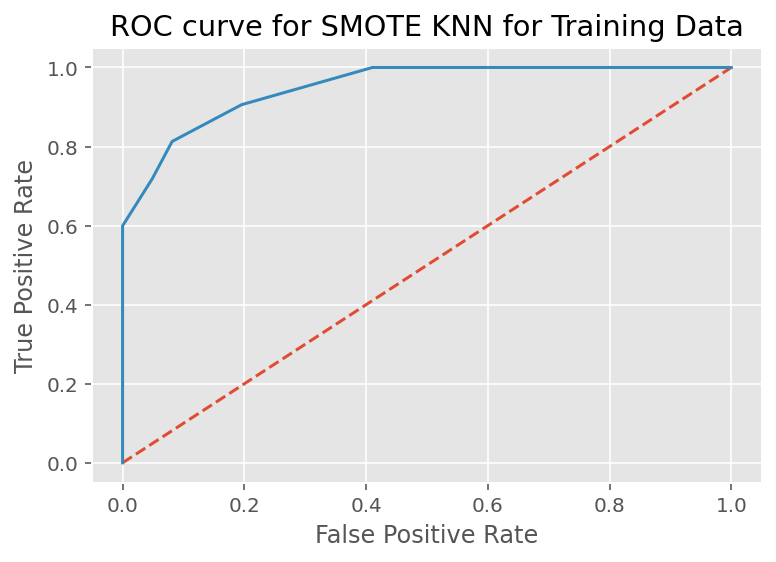

In [248]:
# predict probabilities
probs_knnsm_train = KNN_SM_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_knnsm_train = probs_knnsm_train[:, 1]
# calculate AUC
knnsm_train_auc = roc_auc_score(y_train, probs_knnsm_train)
print('AUC: %.3f' % knnsm_train_auc)
# calculate roc curve
train_fpr_knnsm, train_tpr_knnsm, train_thresholds_knnsm = roc_curve(y_train, probs_knnsm_train)
plt.title('ROC curve for SMOTE KNN for Training Data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr_knnsm, train_tpr_knnsm);

AUC: 0.865


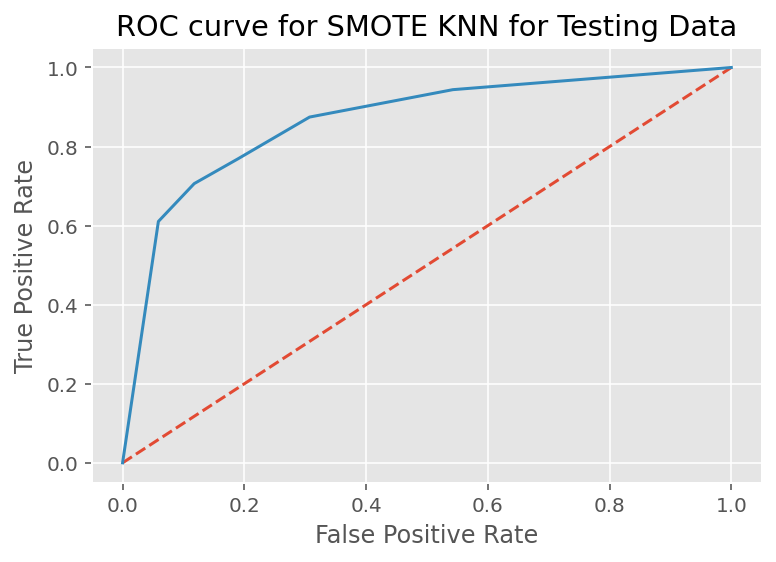

In [249]:
# predict probabilities
probs_knnsm_test = KNN_SM_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_knnsm_test = probs_knnsm_test[:, 1]
# calculate AUC
knnsm_test_auc = roc_auc_score(y_test, probs_knnsm_test)
print('AUC: %.3f' % knnsm_test_auc)
# calculate roc curve
test_fpr_knnsm, test_tpr_knnsm, test_thresholds_knnsm = roc_curve(y_test, probs_knnsm_test)
plt.title('ROC curve for SMOTE KNN for Testing Data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr_knnsm, test_tpr_knnsm);

## GNB with SMOTE

In [250]:
NB_SM_model = GaussianNB()
NB_SM_model.fit(X_train_res, y_train_res)

GaussianNB()

In [251]:
## Performance Matrix on train data set
y_train_predict = NB_SM_model.predict(X_train_res)
model_score = NB_SM_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))

0.8348806366047745
[[634 120]
 [129 625]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       754
           1       0.84      0.83      0.83       754

    accuracy                           0.83      1508
   macro avg       0.83      0.83      0.83      1508
weighted avg       0.83      0.83      0.83      1508



In [252]:
## Performance Matrix on test data set
y_test_predict = NB_SM_model.predict(X_test)
model_score = NB_SM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8070175438596491
[[125  28]
 [ 60 243]]
              precision    recall  f1-score   support

           0       0.68      0.82      0.74       153
           1       0.90      0.80      0.85       303

    accuracy                           0.81       456
   macro avg       0.79      0.81      0.79       456
weighted avg       0.82      0.81      0.81       456



In [254]:
imps = permutation_importance(NB_SM_model, X_test, y_test)
importances = imps.importances_mean
std = imps.importances_std
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(X_test.shape[1]):
    print("%d. %s (%f)" % (f + 1, df.columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. Blair (0.078509)
2. economic_cond_household (0.041667)
3. Hague (0.041228)
4. vote (0.018860)
5. age (0.015789)
6. Europe (0.013596)
7. economic_cond_national (0.008772)
8. political_knowledge (0.002193)


AUC: 0.888


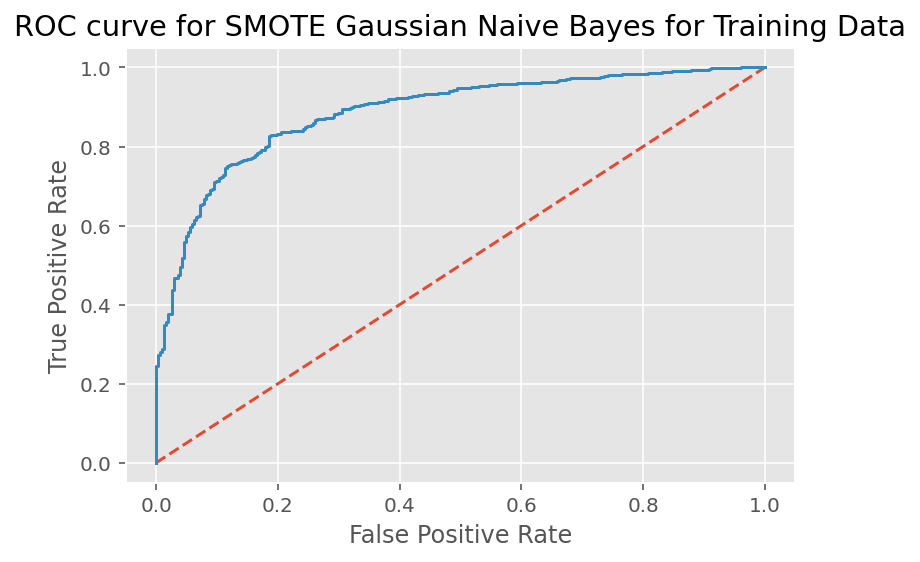

In [255]:
# predict probabilities
probs_nbsm_train = NB_SM_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_nbsm_train = probs_nbsm_train[:, 1]
# calculate AUC
nbsm_train_auc = roc_auc_score(y_train, probs_nbsm_train)
print('AUC: %.3f' % nbsm_train_auc)
# calculate roc curve
train_fpr_nbsm, train_tpr_nbsm, train_thresholds_nbsm = roc_curve(y_train, probs_nbsm_train)
plt.title('ROC curve for SMOTE Gaussian Naive Bayes for Training Data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr_nbsm, train_tpr_nbsm);

AUC: 0.878


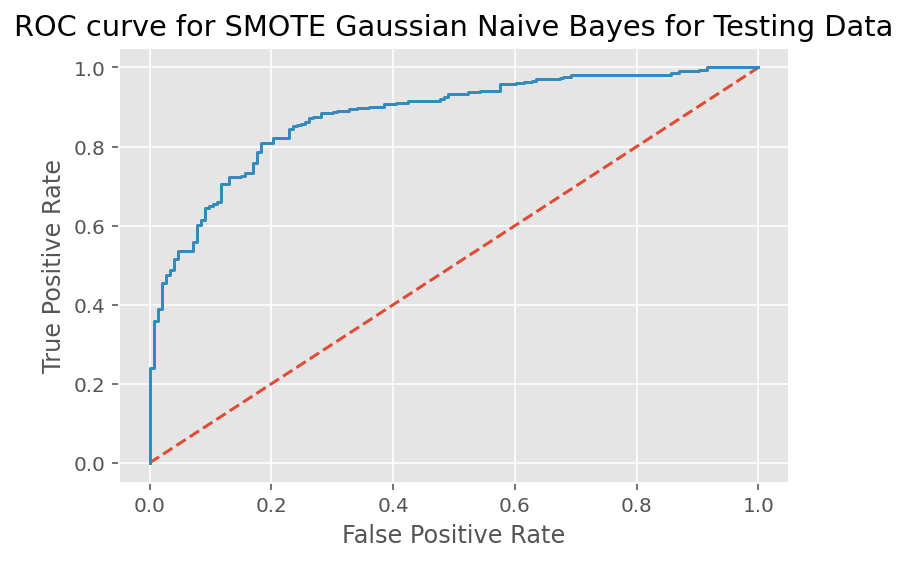

In [256]:
# predict probabilities
probs_nbsm_test = NB_SM_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_nbsm_test = probs_nbsm_test[:, 1]
# calculate AUC
nbsm_test_auc = roc_auc_score(y_test, probs_nbsm_test)
print('AUC: %.3f' % nbsm_test_auc)
# calculate roc curve
test_fpr_nbsm, test_tpr_nbsm, test_thresholds_nbsm = roc_curve(y_test, probs_nbsm_test)
plt.title('ROC curve for SMOTE Gaussian Naive Bayes for Testing Data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr_nbsm, test_tpr_nbsm);

## Problem 2: In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:¶
## President Franklin D. Roosevelt in 1941
### President John F. Kennedy in 1961
### President Richard Nixon in 1973

In [259]:
import nltk
import random
import string
from nltk.corpus import stopwords
from nltk.corpus import inaugural
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
!pip install WordCloud

In [267]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import nltk
import random
import string
from nltk.corpus import stopwords
from nltk.corpus import inaugural
from nltk.tokenize import word_tokenize
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.corpus.reader import CategorizedCorpusReader
from pylab import rcParams
rcParams['figure.figsize'] = 20,8
from IPython.display import display
from nltk.stem.snowball import SnowballStemmer
import json

from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')
nltk.download('punkt')
import warnings 
warnings.filterwarnings( "ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [258]:
nltk.download('inaugural')
inaugural.fileids()
inaugural.raw('1941-Roosevelt.txt')
inaugural.raw('1961-Kennedy.txt')
inaugural.raw('1973-Nixon.txt')

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\inaugural.zip.


'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

# 2.1 Find the number of characters, words, and sentences for the mentioned documents.¶

In [260]:
print("The number of characters in 1941-Roosevelt.txt is:",len(inaugural.raw('1941-Roosevelt.txt')))
print("The number of characters in 1961-Kennedy.txt is:",len(inaugural.raw('1961-Kennedy.txt')))
print("The number of characters in 1973-Nixon.txt is:", len(inaugural.raw('1973-Nixon.txt')))

The number of characters in 1941-Roosevelt.txt is: 7571
The number of characters in 1961-Kennedy.txt is: 7618
The number of characters in 1973-Nixon.txt is: 9991


In [261]:
print("The number of words in 1941-Roosevelt.txt is:",len(inaugural.words('1941-Roosevelt.txt')))
print("The number of words in 1961-Kennedy.txt is:",len(inaugural.words('1961-Kennedy.txt')))
print("The number of words in 1973-Nixon.txt is:", len(inaugural.words('1973-Nixon.txt')))

The number of words in 1941-Roosevelt.txt is: 1536
The number of words in 1961-Kennedy.txt is: 1546
The number of words in 1973-Nixon.txt is: 2028


In [268]:
print("The number of sentences in 1941-Roosevelt.txt is:",len(inaugural.sents('1941-Roosevelt.txt')))
print("The number of sentences in 1961-Kennedy.txt is:",len(inaugural.sents('1961-Kennedy.txt')))
print("The number of sentences in 1973-Nixon.txt is:", len(inaugural.sents('1973-Nixon.txt')))

The number of sentences in 1941-Roosevelt.txt is: 68
The number of sentences in 1961-Kennedy.txt is: 52
The number of sentences in 1973-Nixon.txt is: 69


## 2.2 Remove all the stopwords from the three speeches.

In [270]:
all_words=list(inaugural.words('1941-Roosevelt.txt'))
stop_words =stopwords.words('english') + list(string.punctuation) 
clean_all_words = (x.lower() for x in all_words)
clean_all_words_R = [word for word in clean_all_words if word not in stop_words]

In [271]:
clean_all_words_r = [word for word in clean_all_words_R if word.isalpha()]

In [272]:
print("The number of words after cleaning in 1941-Roosevelt.txt are:",(len(clean_all_words_r)))

The number of words after cleaning in 1941-Roosevelt.txt are: 627


In [273]:
all_words=list(inaugural.words('1961-Kennedy.txt'))
stop_words =stopwords.words('english') + list(string.punctuation) 
clean_all_words = (x.lower() for x in all_words)
clean_all_words_K = [word for word in clean_all_words if word not in stop_words]

In [274]:
clean_all_words_k = [word for word in clean_all_words_K if word.isalpha()]

In [275]:
print("The number of words after cleaning in 1961-Kennedy.txt are:",(len(clean_all_words_k)))

The number of words after cleaning in 1961-Kennedy.txt are: 692


In [276]:
all_words=list(inaugural.words('1973-Nixon.txt'))
stop_words =stopwords.words('english') + list(string.punctuation) 
clean_all_words = (x.lower() for x in all_words)
clean_all_words_N = [word for word in clean_all_words if word not in stop_words]

In [277]:
clean_all_words_n = [word for word in clean_all_words_N if word.isalpha()]

In [278]:
print("The number of words after cleaning in 1973-Nixon.txt are:",(len(clean_all_words_n)))

The number of words after cleaning in 1973-Nixon.txt are: 832


In [279]:
print("The number of words after cleaning in 1973-Nixon.txt are:",(len(clean_all_words_n)))

The number of words after cleaning in 1973-Nixon.txt are: 832


## 2.3 Which word occurs the most number of times in his inaugural address for each president? Mention the top three words.

In [280]:
clean_all_words_freq_R = nltk.FreqDist(clean_all_words_r)
clean_all_words_freq_R.most_common(4)

[('nation', 12), ('know', 10), ('spirit', 9), ('life', 9)]

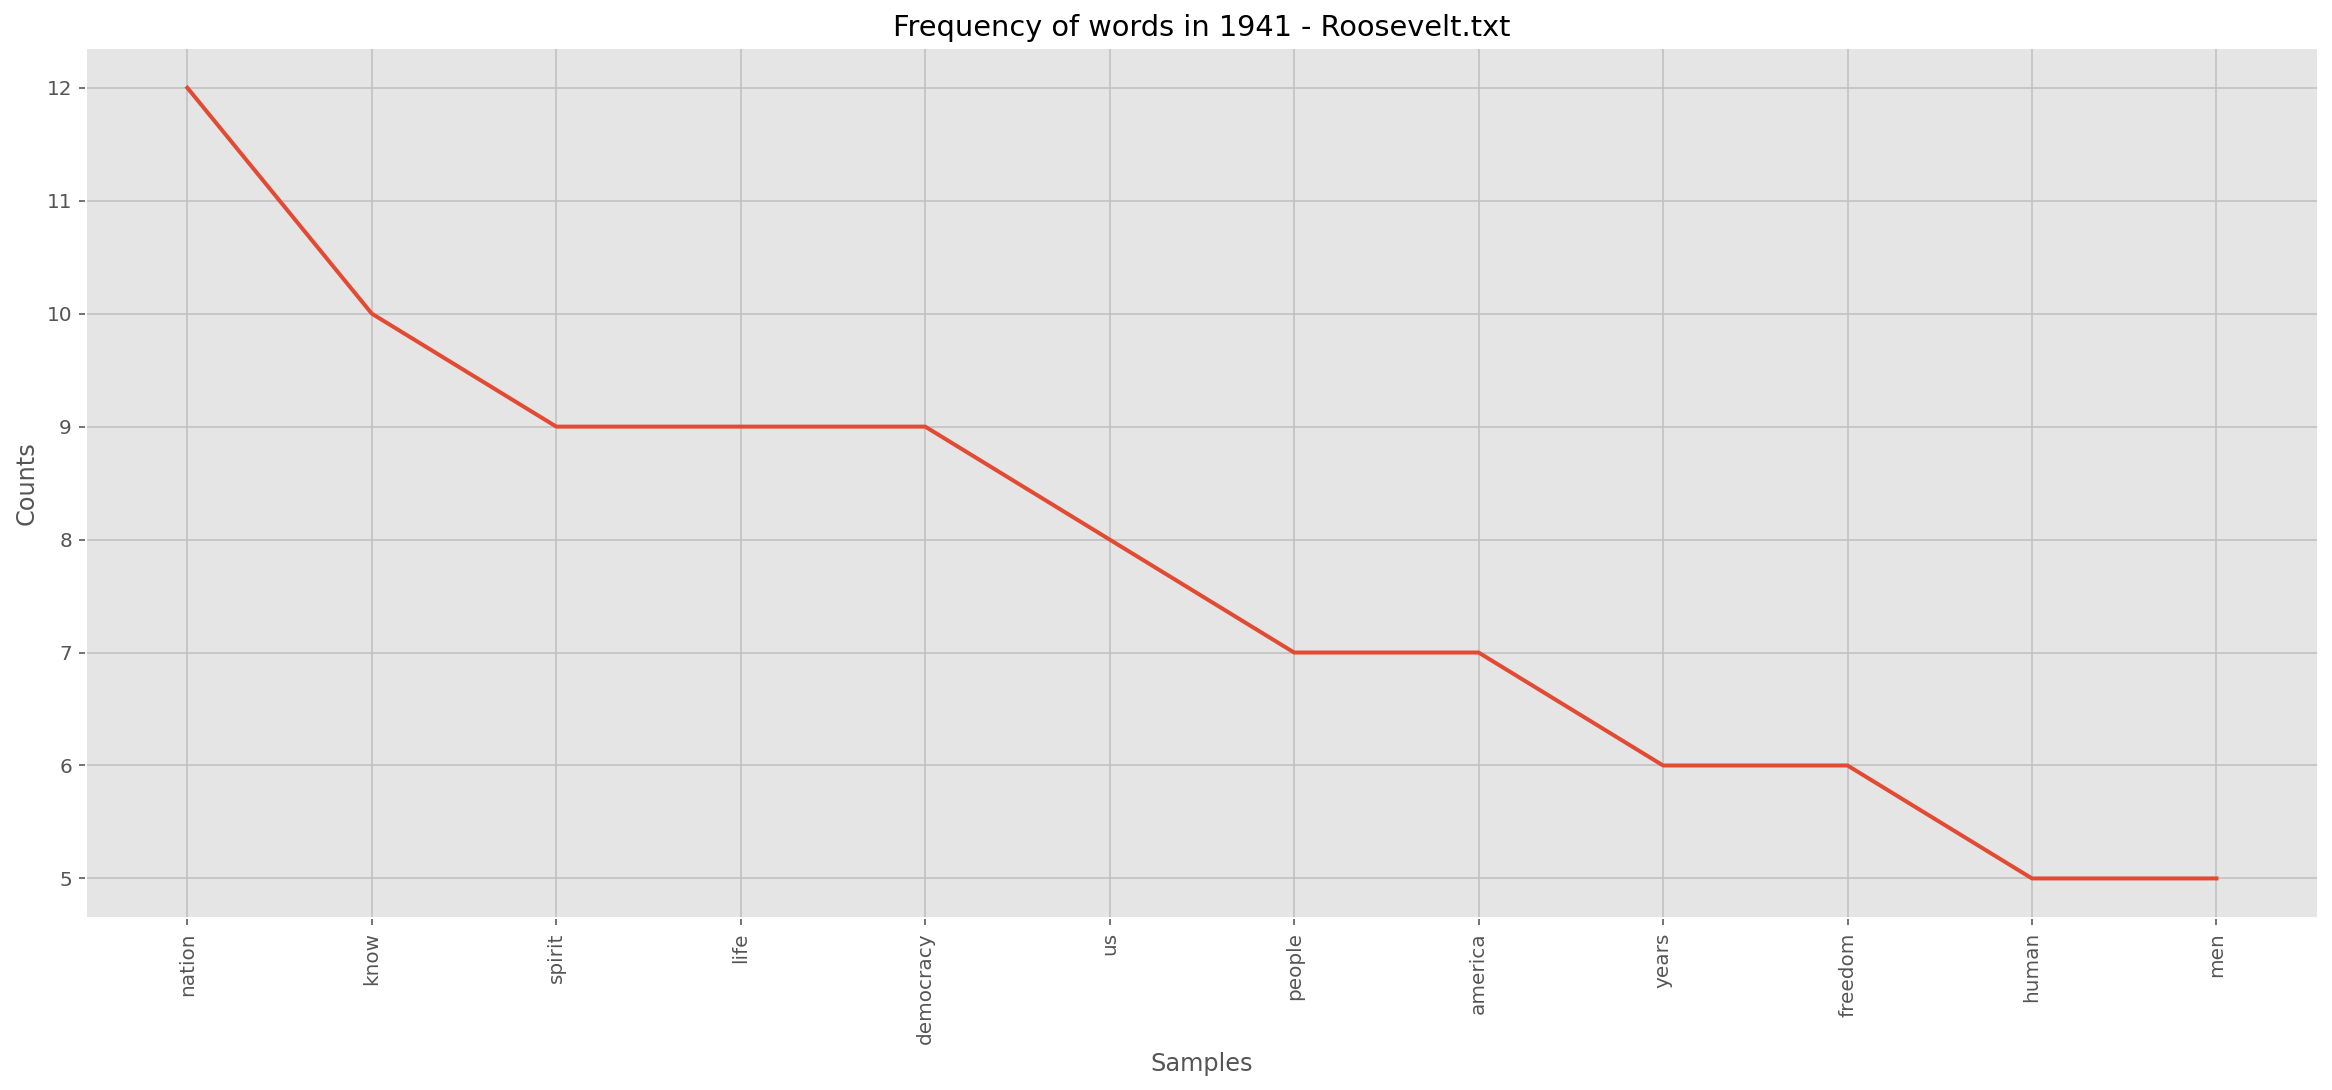

In [281]:
plt.title('Frequency of words in 1941 - Roosevelt.txt')
clean_all_words_freq_R.plot(12);

In [282]:
clean_all_words_freq_K = nltk.FreqDist(clean_all_words_k)
clean_all_words_freq_K.most_common(4)

[('let', 16), ('us', 12), ('world', 8), ('sides', 8)]

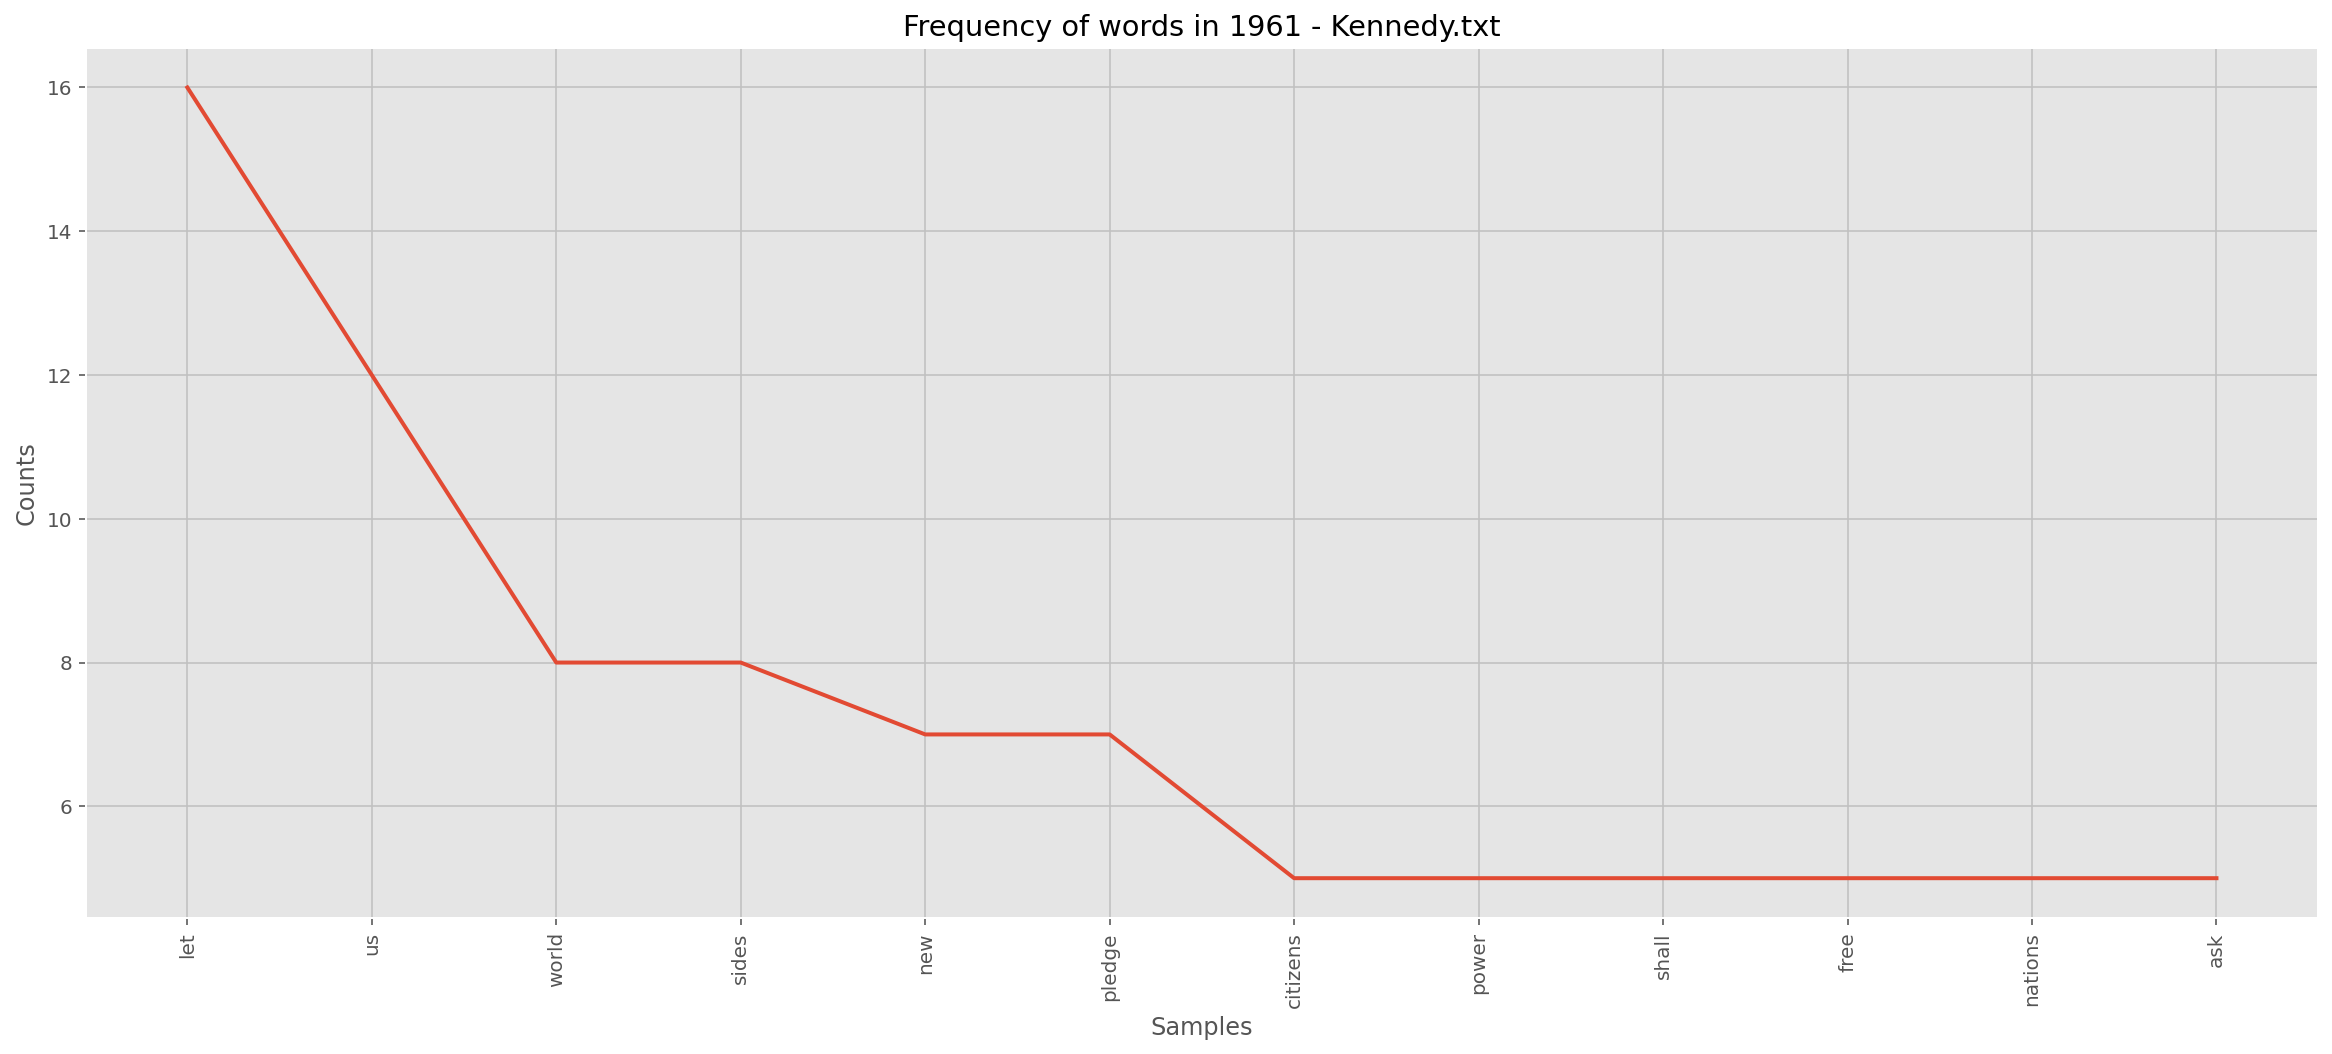

In [283]:
plt.title('Frequency of words in 1961 - Kennedy.txt')
clean_all_words_freq_K.plot(12);

In [284]:
clean_all_words_freq_N = nltk.FreqDist(clean_all_words_n)
clean_all_words_freq_N.most_common(4)

[('us', 26), ('let', 22), ('america', 21), ('peace', 19)]

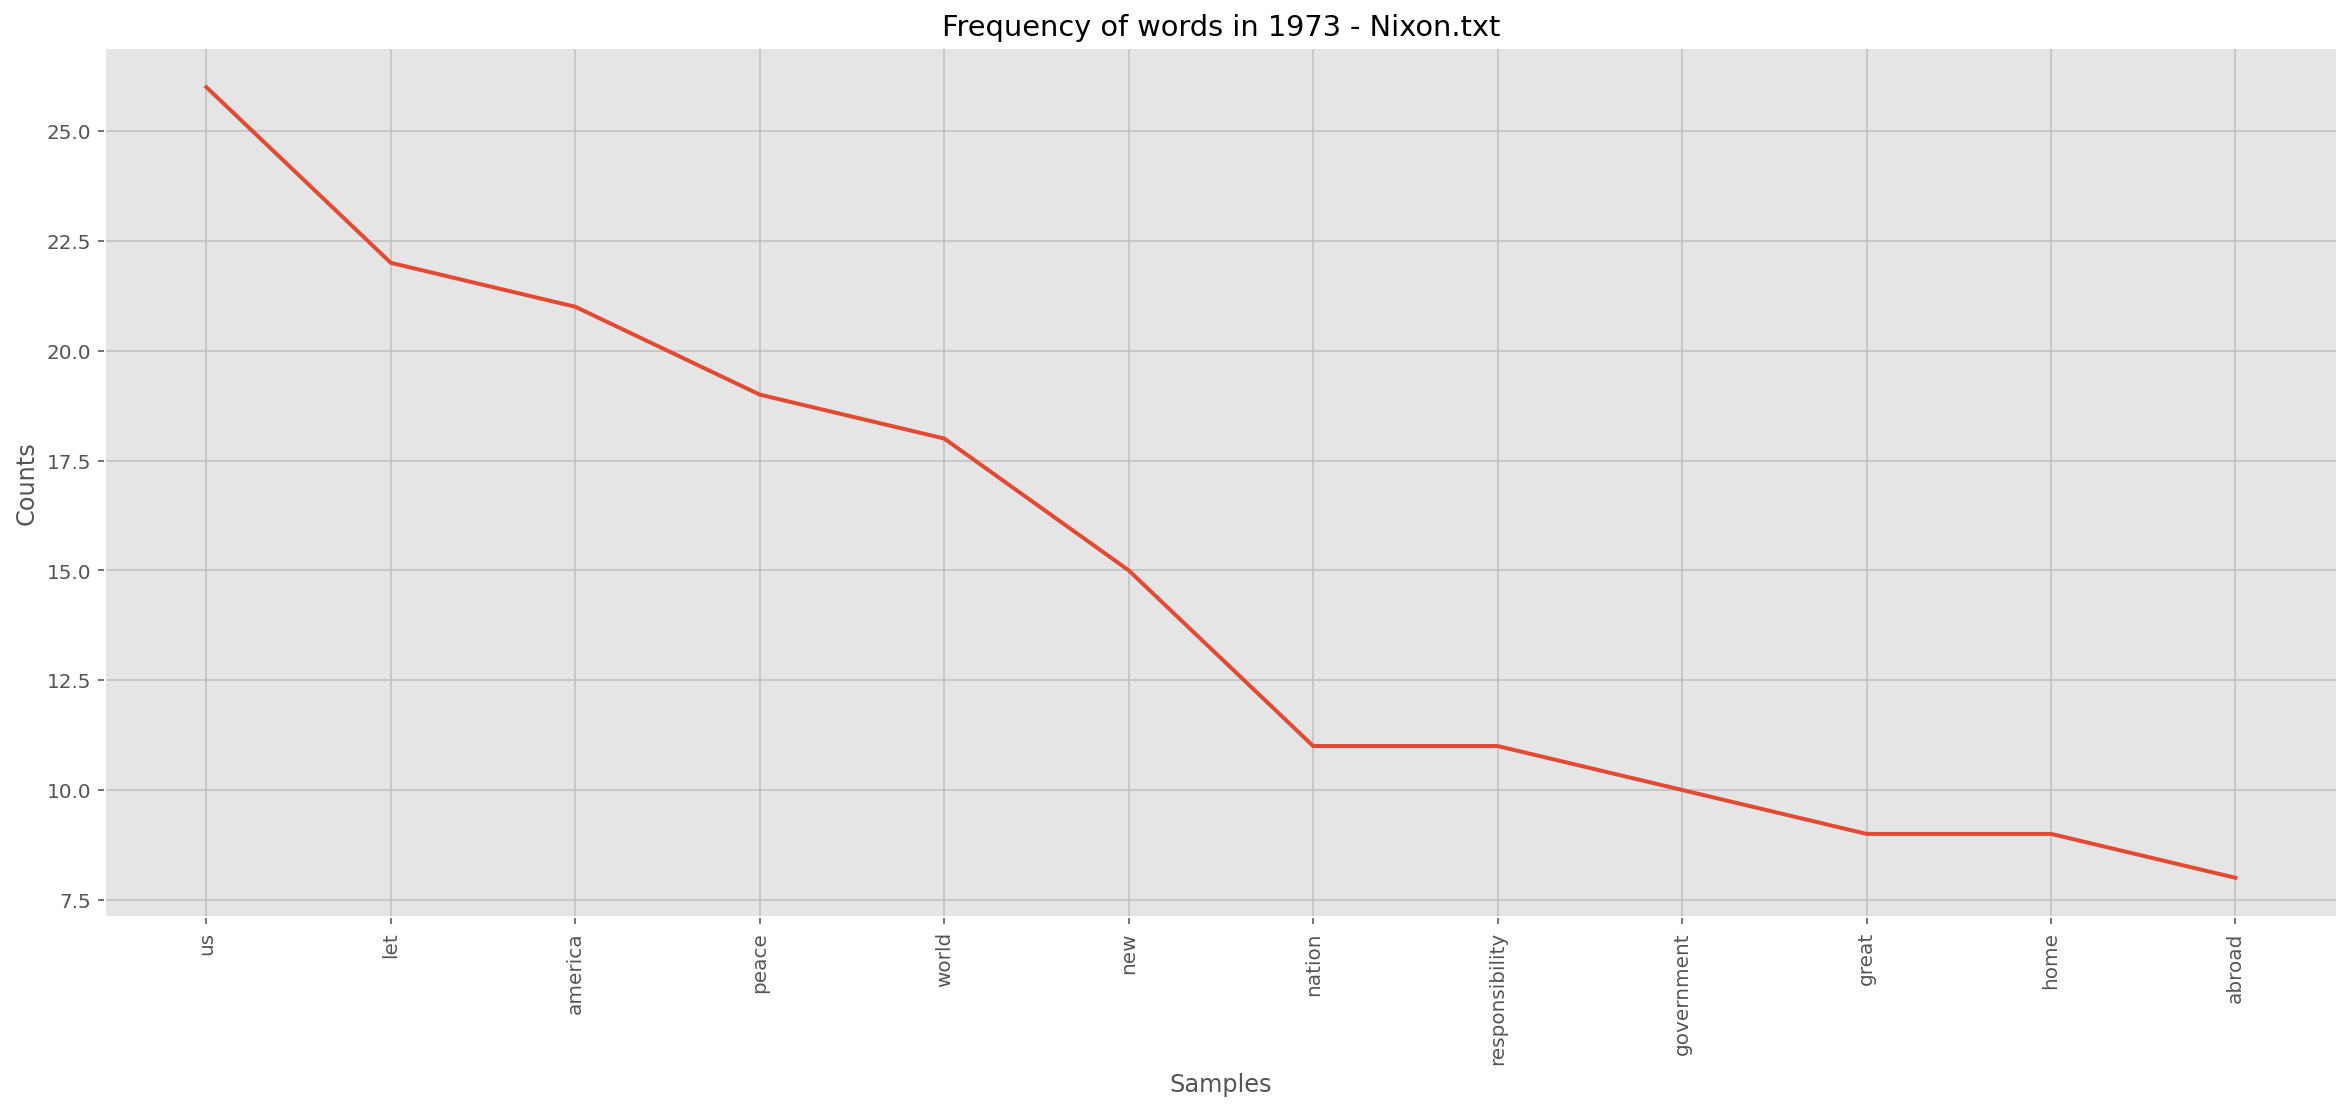

In [285]:
plt.title('Frequency of words in 1973 - Nixon.txt')
clean_all_words_freq_N.plot(12);

## 2.4 Plot the word cloud of each of the speeches of the variable.

In [286]:
wc_a = ' '.join(clean_all_words_r)

Word Cloud for Inaugural-Roosevelt


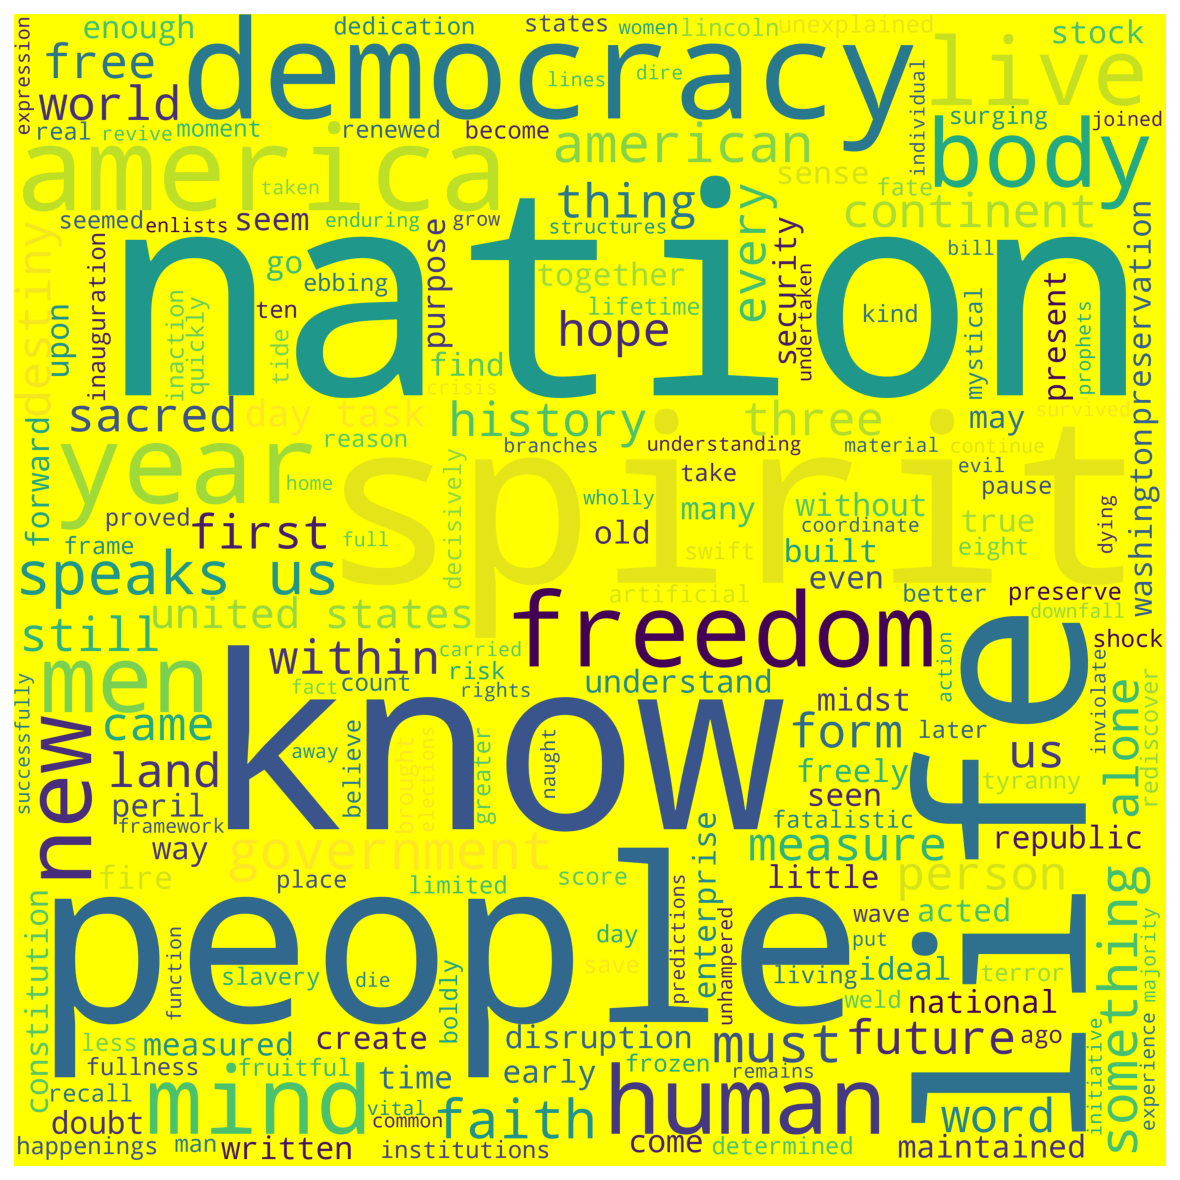

In [291]:
# Word Cloud 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='yellow', 
                min_font_size = 10, random_state=100).generate(wc_a) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for Inaugural-Roosevelt")
plt.show()

In [288]:
wc_b = ' '.join(clean_all_words_k)

Word Cloud for Inaugural-Kennedy


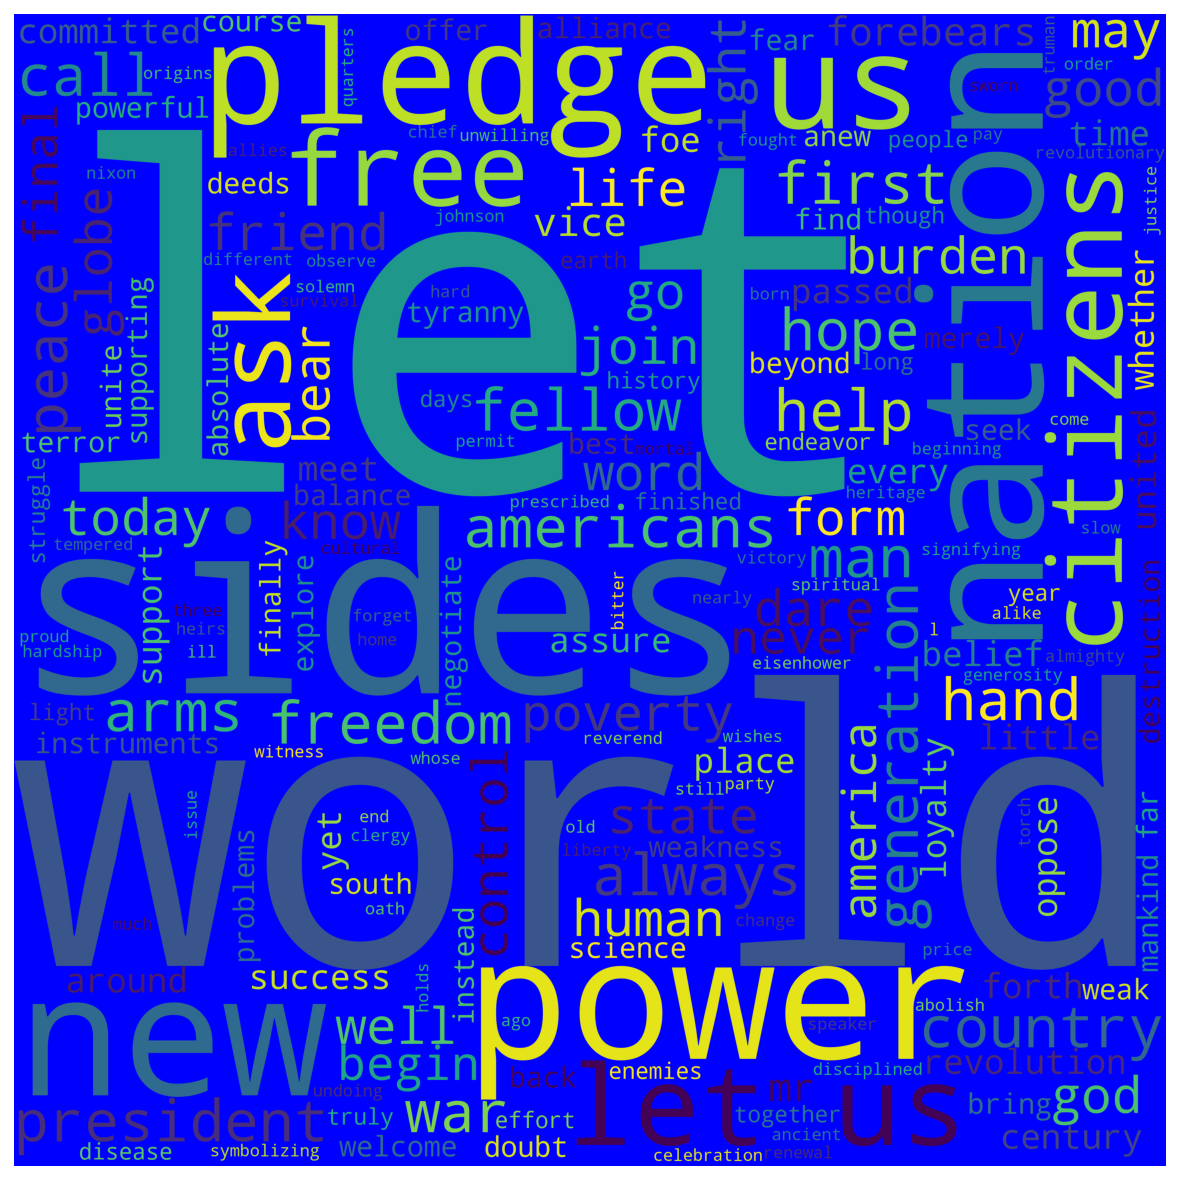

In [292]:
# Word Cloud 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='blue', 
                min_font_size = 10, random_state=100).generate(wc_b) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for Inaugural-Kennedy")
plt.show()

In [294]:
wc_c = ' '.join(clean_all_words_n)

Word Cloud for Inaugural-Nixon


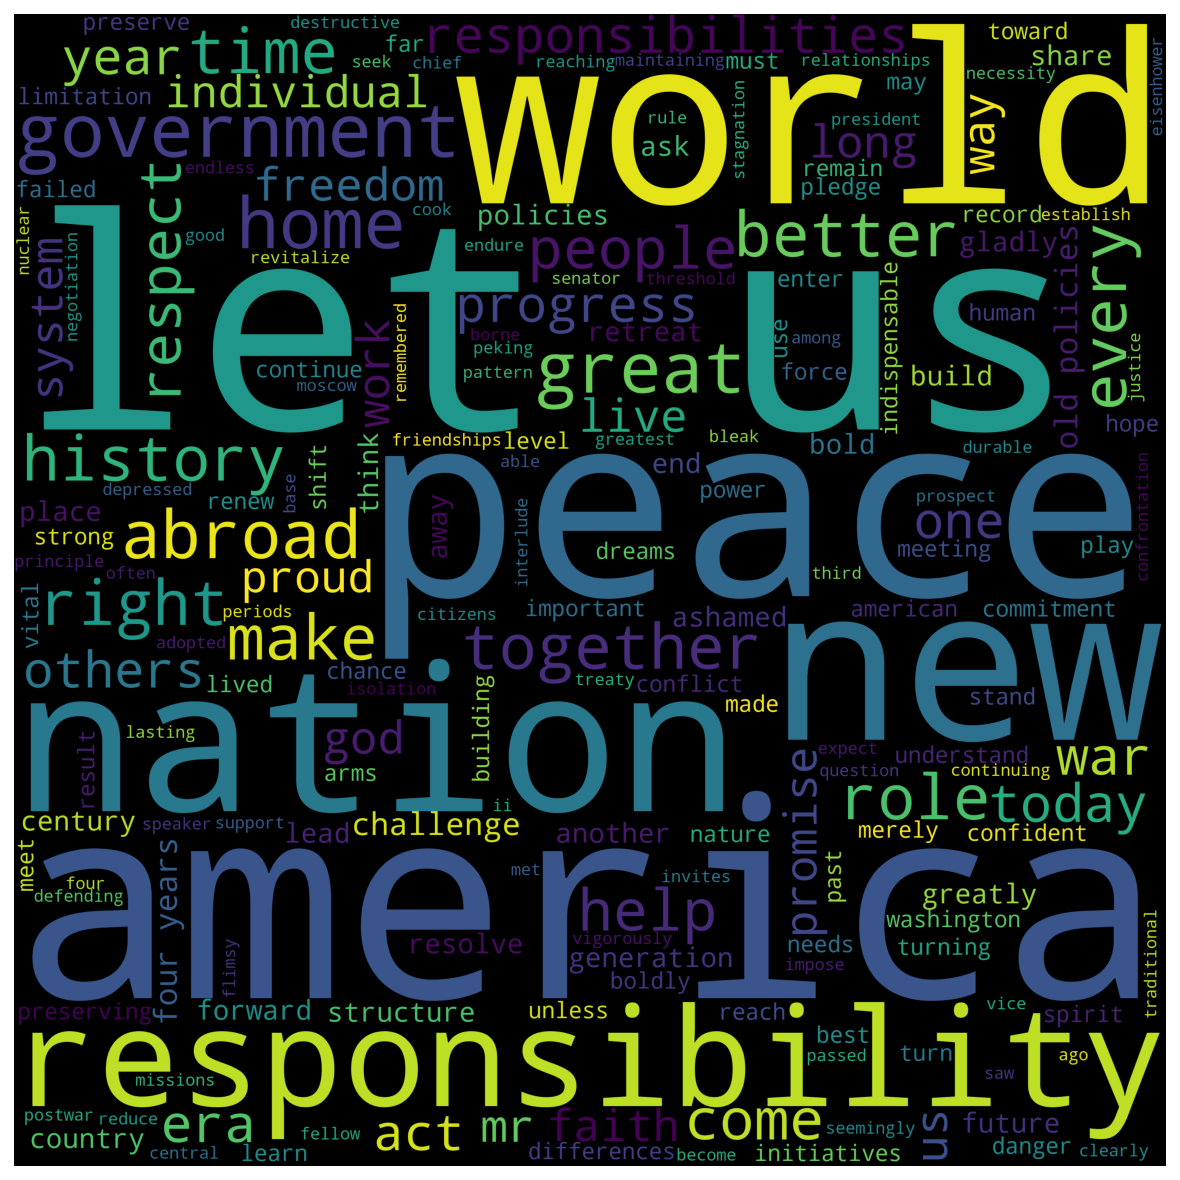

In [295]:
# Word Cloud 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wc_c) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for Inaugural-Nixon")
plt.show()

# End of Report